In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

In [ ]:
df.head().T

,0,1,2,3,4
ID,1,3,4,15,16
Project Code,100-CI-T01,108-VN-T01,100-CI-T01,108-VN-T01,108-VN-T01
PQ #,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process,Pre-PQ Process
PO / SO #,SCMS-4,SCMS-13,SCMS-20,SCMS-78,SCMS-81
ASN/DN #,ASN-8,ASN-85,ASN-14,ASN-50,ASN-55
Country,Côte d'Ivoire,Vietnam,Côte d'Ivoire,Vietnam,Vietnam
Managed By,PMO - US,PMO - US,PMO - US,PMO - US,PMO - US
Fulfill Via,Direct Drop,Direct Drop,Direct Drop,Direct Drop,Direct Drop
Vendor INCO Term,EXW,EXW,FCA,EXW,EXW
Shipment Mode,Air,Air,Air,Air,Air


In [ ]:
df.shape

(10324, 33)

In [ ]:
# Changing column names to lower case and removing unwanted spaces 
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

#Exploratory Data Analysis

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. 
The function will accept coulmn name and number of bins as arguments
The function will display the statistical description of the numeric variable,skewness,histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project_code                  10324 non-null  object 
 2   pq_#                          10324 non-null  object 
 3   po_/_so_#                     10324 non-null  object 
 4   asn/dn_#                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed_by                    10324 non-null  object 
 7   fulfill_via                   10324 non-null  object 
 8   vendor_inco_term              10324 non-null  object 
 9   shipment_mode                 9964 non-null   object 
 10  pq_first_sent_to_client_date  10324 non-null  object 
 11  po_sent_to_vendor_date        10324 non-null  object 
 12  scheduled_delivery_date       10324 non-null  object 
 13  d

In [ ]:
df.describe()

,id,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,line_item_insurance_(usd)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Dropping some columns which are not helpful in Model Building
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

##Missing Data Imputation

In [ ]:
df.isnull().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
w

We have missing values in 3 columns<br>
`Shipment Mode` `Dosage` `Line Item Insurance`

In [ ]:
#making a sepaprate dataframe for missing data
missing_data = df[['shipment_mode','dosage','line_item_insurance_(usd)']]

###Shipment Mode

In [ ]:
df['shipment_mode'].sample(10)

1070      Air
3818      Air
3170    Truck
9934      Air
1722      Air
3241      Air
1056      Air
9924      Air
1588      Air
2858      Air
Name: shipment_mode, dtype: object

In [ ]:
df['shipment_mode'].nunique()

4

In [ ]:
df['shipment_mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

In [ ]:
def plot(df,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    df.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    sm=df.value_counts().index
    df.value_counts().plot.pie(labels=sm,autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

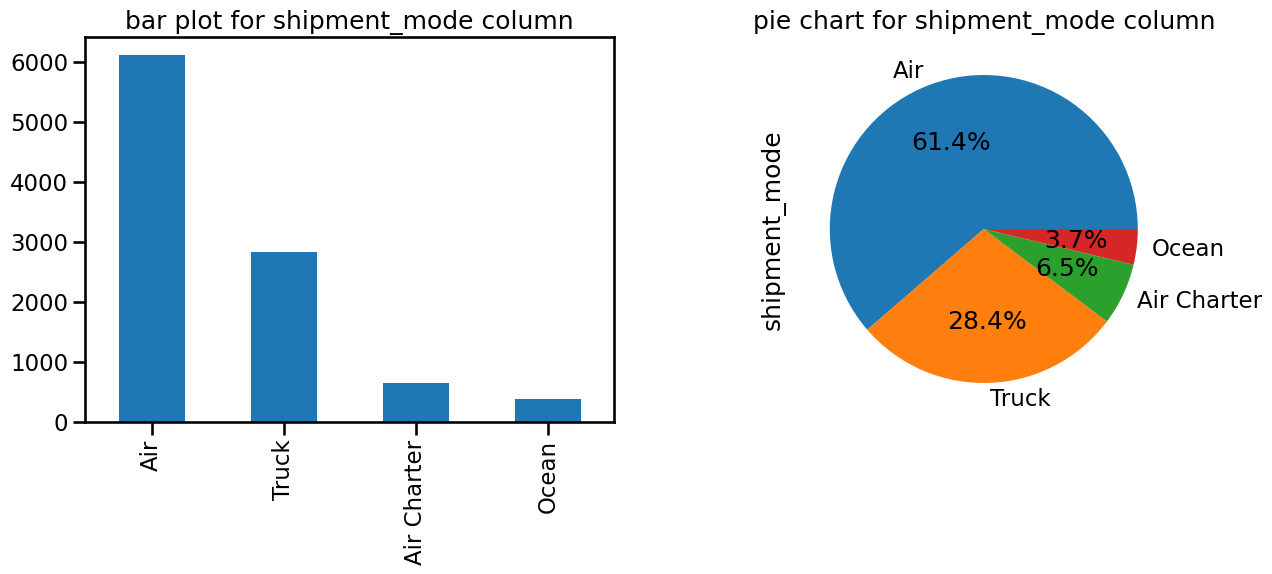

In [ ]:
plot(df['shipment_mode'],"shipment_mode")

In [ ]:
missing_data["shipment_mode"].fillna("Air",inplace=True)
missing_data["shipment_mode"].value_counts(dropna=False)

Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

###Dosage

In [ ]:
percent_missing_values=df["dosage"].isnull().sum()/df.shape[0]
print('% Missing Values in Dosage =',np.round(percent_missing_values,2)*100)

% Missing Values in Dosage = 17.0


In [ ]:
df["dosage"].value_counts().head()

300mg            990
200mg            932
600mg            772
150/300mg        600
150/300/200mg    580
Name: dosage, dtype: int64

In [ ]:
# Better to drop this column as imputing 17% of missing data would not be good for model building
missing_data.drop("dosage",axis=1,inplace=True)

###line_item_insurance_(usd)

In [ ]:
missing_data["line_item_insurance_(usd)"].value_counts().head()

0.00    54
0.02    37
0.07    33
0.06    30
0.05    30
Name: line_item_insurance_(usd), dtype: int64

In [ ]:
missing_data["line_item_insurance_(usd)"].replace(to_replace = np.NaN, value = missing_data["line_item_insurance_(usd)"].median(),inplace=True)

In [ ]:
missing_data.isnull().sum()

shipment_mode                0
line_item_insurance_(usd)    0
dtype: int64

So here we have filled/dropped the missing values in our dataset

Now we will drop the 3 rows in the main df and replace them with the filled/cleaned columns

In [ ]:
# Dropping the original columns
df.drop(["shipment_mode","dosage","line_item_insurance_(usd)"],axis=1,inplace=True)

In [ ]:
# Concatenating the imputed columns
df=pd.concat([df,missing_data],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   po_/_so_#                     10324 non-null  object 
 1   asn/dn_#                      10324 non-null  object 
 2   country                       10324 non-null  object 
 3   managed_by                    10324 non-null  object 
 4   fulfill_via                   10324 non-null  object 
 5   vendor_inco_term              10324 non-null  object 
 6   pq_first_sent_to_client_date  10324 non-null  object 
 7   po_sent_to_vendor_date        10324 non-null  object 
 8   scheduled_delivery_date       10324 non-null  object 
 9   delivered_to_client_date      10324 non-null  object 
 10  delivery_recorded_date        10324 non-null  object 
 11  product_group                 10324 non-null  object 
 12  sub_classification            10324 non-null  object 
 13  v

#Separating Numeric and Object Datatype columns for better analysis

In [ ]:
# Separating Numeric and object datatype data and storing them separately for analysis
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]
objcols=df[obj_cols]

num_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]
numcols=df[num_cols]

In [ ]:
# Unique count in Object data
for cols in objcols.columns[0:]:
    print(cols," = ",len(objcols[cols].unique()))

po_/_so_#  =  6233
asn/dn_#  =  7030
country  =  43
managed_by  =  4
fulfill_via  =  2
vendor_inco_term  =  8
pq_first_sent_to_client_date  =  765
po_sent_to_vendor_date  =  897
scheduled_delivery_date  =  2006
delivered_to_client_date  =  2093
delivery_recorded_date  =  2042
product_group  =  5
sub_classification  =  6
vendor  =  73
item_description  =  184
molecule/test_type  =  86
brand  =  48
dosage_form  =  17
manufacturing_site  =  88
first_line_designation  =  2
weight_(kilograms)  =  4688
freight_cost_(usd)  =  6733
shipment_mode  =  4


##po_/_so_#

#### The function reorder takes a string as input and returns a new string after performing some operations on it.

* Here's how the function works:

* The input string is passed to the function as the argument df.
* The string is split into a list of substrings using the split() method. The delimiter used to split the string is the hyphen (-). The resulting list is stored in the variable df_split.
* The first element of the list (index 0) is extracted and stored in the variable df_return.
* Finally, the function returns the value stored in df_return.For example, if you call reorder with the input string "SO-4568", the function will split the string into a list ["SO", "4568"] and return the string "SO".

In [ ]:
def reorder(df):
    df_split=df.split("-")
    df_return=df_split[0]
    return df_return

In [ ]:
df["po_/_so_#"].value_counts().head()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
Name: po_/_so_#, dtype: int64

In [ ]:
df["po_/_so_#"]=df["po_/_so_#"].apply(reorder)
df["po_/_so_#"].value_counts()

SO      5404
SCMS    4919
DSCM       1
Name: po_/_so_#, dtype: int64

In [ ]:
#We can replace the `DSCM` category as it has only occured once
df["po_/_so_#"]=df["po_/_so_#"].replace('DSCM',"SO")

In [ ]:
df["po_/_so_#"].value_counts()

SO      5405
SCMS    4919
Name: po_/_so_#, dtype: int64

##asn/dn_# 

In [ ]:
df["asn/dn_#"].value_counts().head()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
Name: asn/dn_#, dtype: int64

In [ ]:
df["asn/dn_#"].value_counts().tail()

ASN-11200    1
ASN-23000    1
ASN-19497    1
ASN-24569    1
DN-4334      1
Name: asn/dn_#, dtype: int64

In [ ]:
# Applying the Reorder function
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)
df["asn/dn_#"].value_counts()

DN     5404
ASN    4920
Name: asn/dn_#, dtype: int64

* DN / ASN = Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries<br>
* DN(Delivery Note) is most used or preferred for Shipment Number

##Country

In [ ]:
print(df["country"].value_counts().head(),'\n')
print(df["country"].value_counts().tail())

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Name: country, dtype: int64 

Kyrgyzstan      2
Kazakhstan      2
Burkina Faso    2
Guinea          1
Belize          1
Name: country, dtype: int64


Text(0.5, 0, 'Country Name')

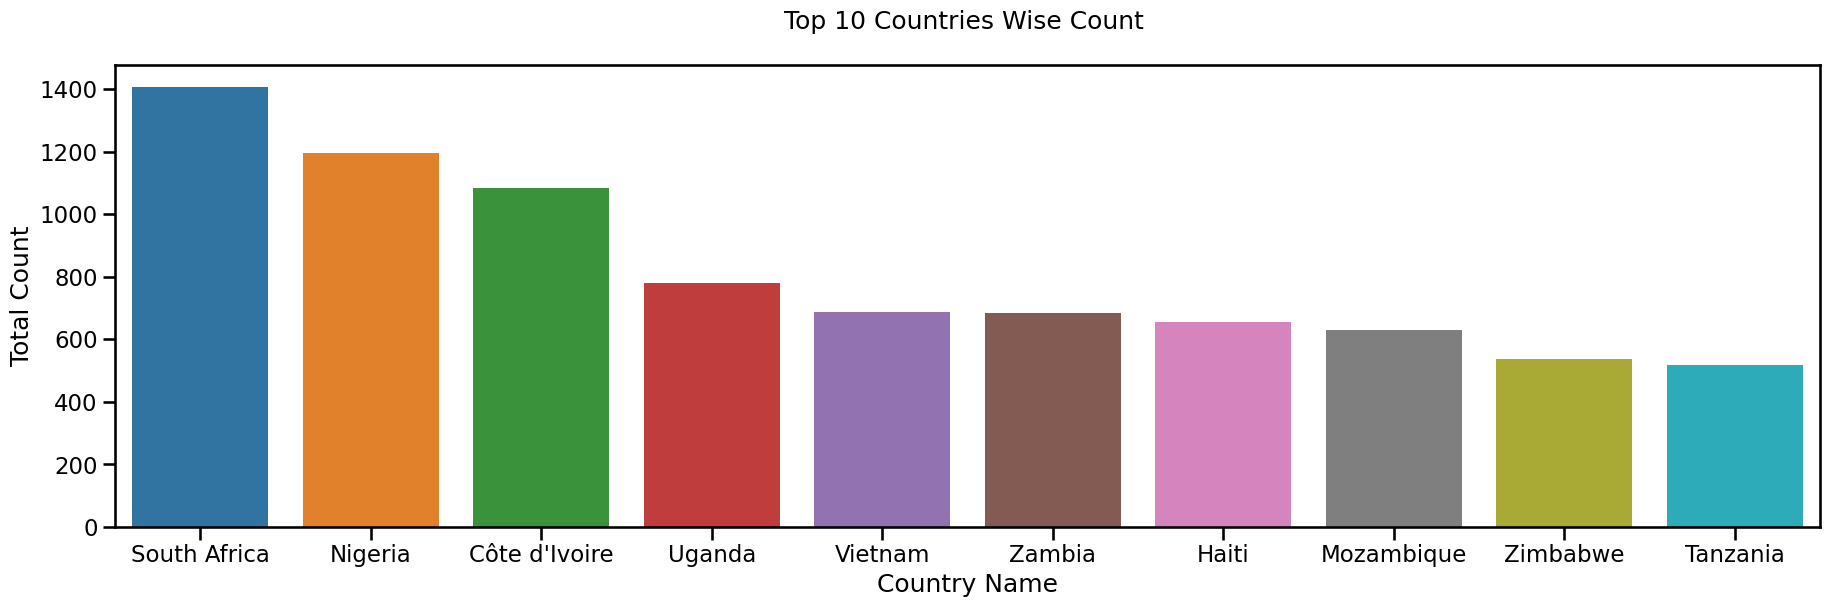

In [ ]:
Count = df["country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(x=df['country'],order = Count.index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

* South Africa is the most preferred Destination country for the shipments followed by Nigeria , Côte d'Ivoire while Guinea and Belize being the least.

##managed_by

In [ ]:
df["managed_by"].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: managed_by, dtype: int64

* Managed By = SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
* Almost all the Management office are located in US hence it does not provide any useful information so,we can drop it from our variables.

In [ ]:
df.drop("managed_by",axis=1,inplace=True)

##fulfill_via

In [ ]:
df["fulfill_via"].value_counts()

From RDC       5404
Direct Drop    4920
Name: fulfill_via, dtype: int64

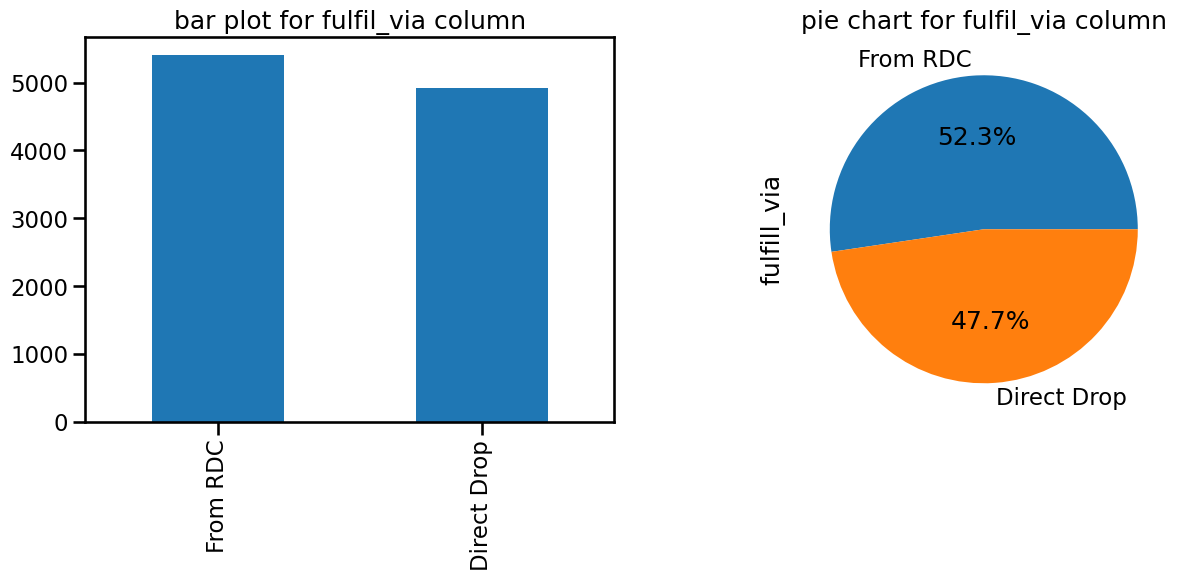

In [ ]:
plot(df["fulfill_via"],"fulfil_via")

##vendor_inco_term

In [ ]:
df["vendor_inco_term"].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: vendor_inco_term, dtype: int64

In [ ]:
np.round(df["vendor_inco_term"].value_counts(normalize=True),2)

N/A - From RDC    0.52
EXW               0.27
DDP               0.14
FCA               0.04
CIP               0.03
DDU               0.00
DAP               0.00
CIF               0.00
Name: vendor_inco_term, dtype: float64

In [ ]:
other_class=df["vendor_inco_term"].value_counts().to_dict()
df_others=[]
for key,val in other_class.items():
    if val<=1000:
        df_others.append(key) 

In [ ]:
df["vendor_inco_term"]=df["vendor_inco_term"].replace(df_others,"others")

In [ ]:
df["vendor_inco_term"].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
others             699
Name: vendor_inco_term, dtype: int64

##pq_first_sent_to_client_date

In [ ]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

Pre-PQ Process       2476
Date Not Captured     205
09-11-2014            205
07-11-2013            173
4/30/14               123
Name: pq_first_sent_to_client_date, dtype: int64 

7/29/10       1
10-03-2011    1
12/17/13      1
02-05-2015    1
8/29/13       1
Name: pq_first_sent_to_client_date, dtype: int64


In [ ]:
df["pq_first_sent_to_client_date"].nunique()

765

In [ ]:
df["pq_first_sent_to_client_date"].min()

'01-02-2012'

In [ ]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [ ]:
df["pq_first_sent_to_client_date"].describe(include=all)

count              10324
unique               765
top       Pre-PQ Process
freq                2476
Name: pq_first_sent_to_client_date, dtype: object

#### Function called client_dates
* This code is a function called client_dates that takes in a date as a string. The function has three branches. The first branch checks if the input date is equal to the string "Pre-PQ Process", and if so, it returns a specific pre-defined date in the format "%d/%m/%Y" using the pd.to_datetime function from the pandas library.
* The second branch checks if the input date is equal to the string "Date Not Captured", and if so, it returns the string "Date Not Captured" without modifying it.
* The third branch is executed if the input date is not equal to either of the previous two strings. This branch checks if the length of the input date string is less than 9 characters, and if so, it converts the date to the format "%m/%d/%y" using the pd.to_datetime function and returns the date.
* If the length of the input date string is not less than 9 characters, it replaces all occurrences of the character "-" with the character "/" in the input date string and then converts the date to the format "%d/%m/%Y" using the pd.to_datetime function and returns the date.

In [ ]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [ ]:
df["pq_first_sent_to_client_date"]=df["pq_first_sent_to_client_date"].apply(client_dates)

In [ ]:
df["pq_first_sent_to_client_date"].head(5)

0    2009-06-01 00:00:00
1    2009-06-01 00:00:00
2    2009-06-01 00:00:00
3    2009-06-01 00:00:00
4    2009-06-01 00:00:00
Name: pq_first_sent_to_client_date, dtype: object

In [ ]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

2009-06-01 00:00:00    2476
Date Not Captured       205
2014-11-09 00:00:00     205
2013-11-07 00:00:00     173
2014-04-30 00:00:00     123
Name: pq_first_sent_to_client_date, dtype: int64 

2010-07-29 00:00:00    1
2011-03-10 00:00:00    1
2013-12-17 00:00:00    1
2015-05-02 00:00:00    1
2013-08-29 00:00:00    1
Name: pq_first_sent_to_client_date, dtype: int64


In [ ]:
#we can now drop the rows with 'Date not captured' as they are very less
df.drop(df.index[df["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [ ]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

2009-06-01    2476
2014-11-09     205
2013-11-07     173
2014-04-30     123
2009-06-11      98
Name: pq_first_sent_to_client_date, dtype: int64 

2013-02-07    1
2010-09-21    1
2014-04-08    1
2012-07-11    1
2013-08-29    1
Name: pq_first_sent_to_client_date, dtype: int64


##po_sent_to_vendor_date

In [ ]:
print(df["po_sent_to_vendor_date"].value_counts().head(),'\n')
print(df["po_sent_to_vendor_date"].value_counts().tail())

N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: po_sent_to_vendor_date, dtype: int64 

5/18/15       1
02-10-2014    1
10/16/13      1
12-09-2011    1
8/29/12       1
Name: po_sent_to_vendor_date, dtype: int64


In [ ]:
df["po_sent_to_vendor_date"].value_counts(normalize=True).head(6)*100

N/A - From RDC       51.378595
Date Not Captured     3.241427
8/27/14               0.790592
3/19/10               0.770827
8/29/14               0.751062
10-09-2014            0.701650
Name: po_sent_to_vendor_date, dtype: float64

* po_sent_to_vendor_date = Date the PO is first sent to the vendor
* Dropping column as it's more than 50% infomation is captured by from RDC which is categorical and unknown to us.

In [ ]:
df.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

##scheduled_delivery_date

In [ ]:
df["scheduled_delivery_date"].value_counts().head()

29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
Name: scheduled_delivery_date, dtype: int64

In [ ]:
df["scheduled_delivery_date"].value_counts().tail()

04-Apr-15    1
05-Jan-15    1
20-Jun-15    1
24-Apr-14    1
09-Sep-15    1
Name: scheduled_delivery_date, dtype: int64

This function transforms a string representation of a date in the format "DD-MMM-YY" (e.g. "16-Jan-22") into a pandas datetime object. The function does this in three steps:

* The first line of the function uses the .replace() method to replace all hyphens (-) in the input string data with forward slashes (/). This is done because the pd.to_datetime() function expects the input string to be in the format "DD/MMM/YY", where "DD" is the day of the month, "MMM" is the three-letter abbreviation for the month, and "YY" is the two-digit year.

* The second line of the function uses the pd.to_datetime() function to convert the modified string into a pandas datetime object. The format parameter is set to "%d/%b/%y", which specifies the format of the input string. The %d directive represents the day of the month (as a zero-padded two-digit number), the %b directive represents the three-letter abbreviation for the month, and the %y directive represents the two-digit year.

* The third and final line of the function returns the resulting pandas datetime object.


In [ ]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [ ]:
#This is only to change the date format month (eg. from Jan to 01)
df["scheduled_delivery_date"]=df["scheduled_delivery_date"].apply(transform_date)
df["scheduled_delivery_date"].value_counts().head()

2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
Name: scheduled_delivery_date, dtype: int64

In [ ]:
df["scheduled_delivery_date"].value_counts().tail()

2015-04-04    1
2015-01-05    1
2015-06-20    1
2014-04-24    1
2015-09-09    1
Name: scheduled_delivery_date, dtype: int64

##delivery_recorded_date

In [ ]:
#delivery_recorded_date column
df["delivery_recorded_date"]=df["delivery_recorded_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
Name: delivered_to_client_date, dtype: int64

##delivered_to_client_date

In [ ]:
df["delivered_to_client_date"]=df["delivered_to_client_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
Name: delivered_to_client_date, dtype: int64

##product_group

In [ ]:
df["product_group"].value_counts()

ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: product_group, dtype: int64

In [ ]:
np.round(df["product_group"].value_counts(normalize=True)*100,2)

ARV     82.47
HRDT    17.08
ANTM     0.22
ACT      0.16
MRDT     0.08
Name: product_group, dtype: float64

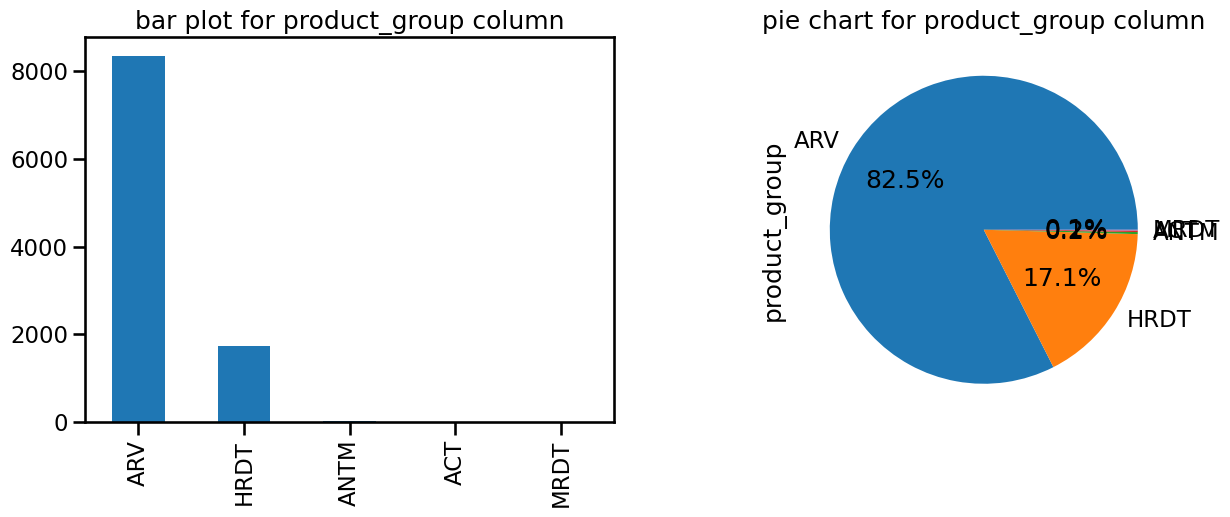

In [ ]:
plot(df["product_group"],"product_group")

Text(0.5, 1.0, 'bar chart for product group')

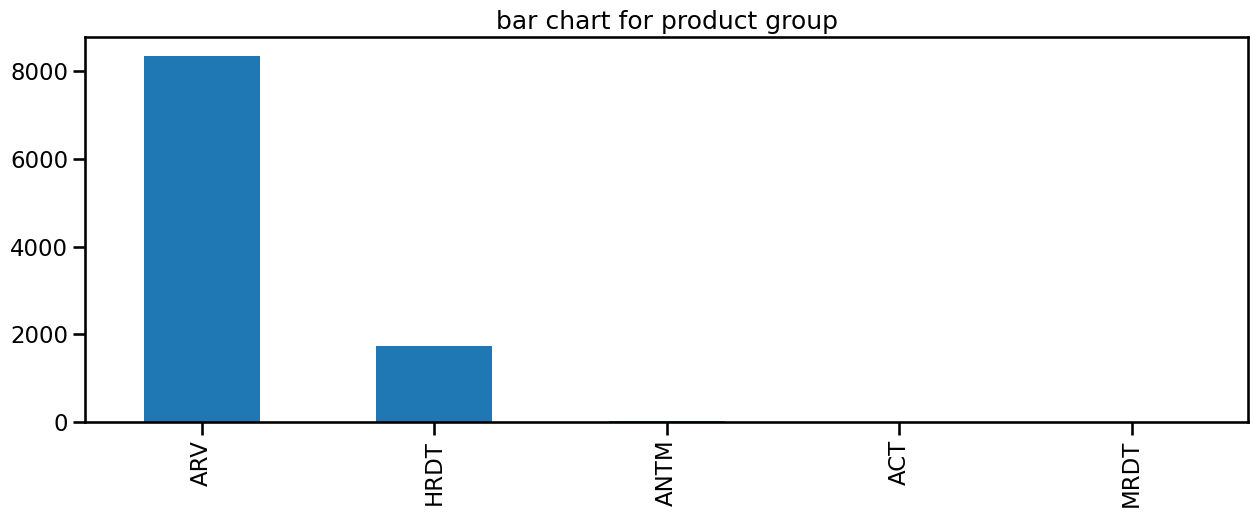

In [ ]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

Note here: More than 80% category are ARV, so lets make 2 product groups. One for ARV and other for remaining ones

In [ ]:
other_product=df["product_group"].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key) 

In [ ]:
df["product_group"]=df["product_group"].replace(HRDT,"other")

In [ ]:
df["product_group"].value_counts()

ARV      8345
other    1774
Name: product_group, dtype: int64

Text(0.5, 1.0, 'bar chart for product group')

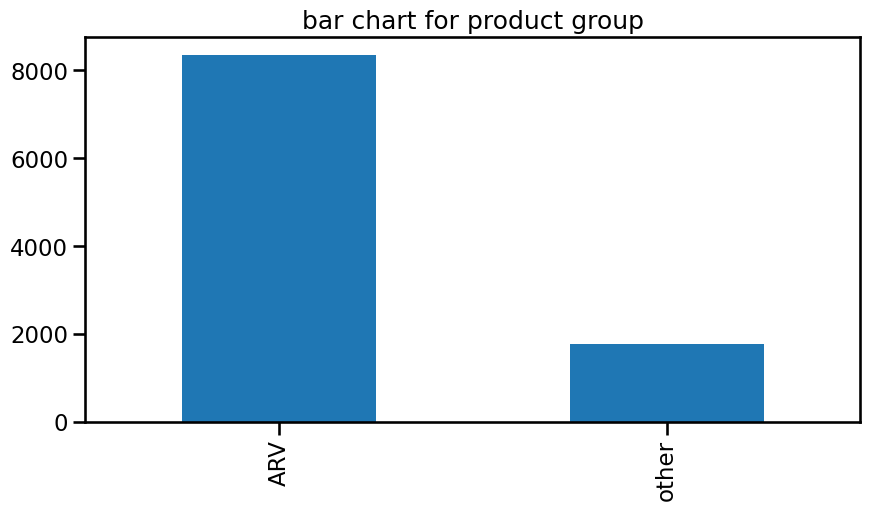

In [ ]:
plt.figure(figsize=(10,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

##sub_classification

In [ ]:
df["sub_classification"].value_counts()

Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: sub_classification, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

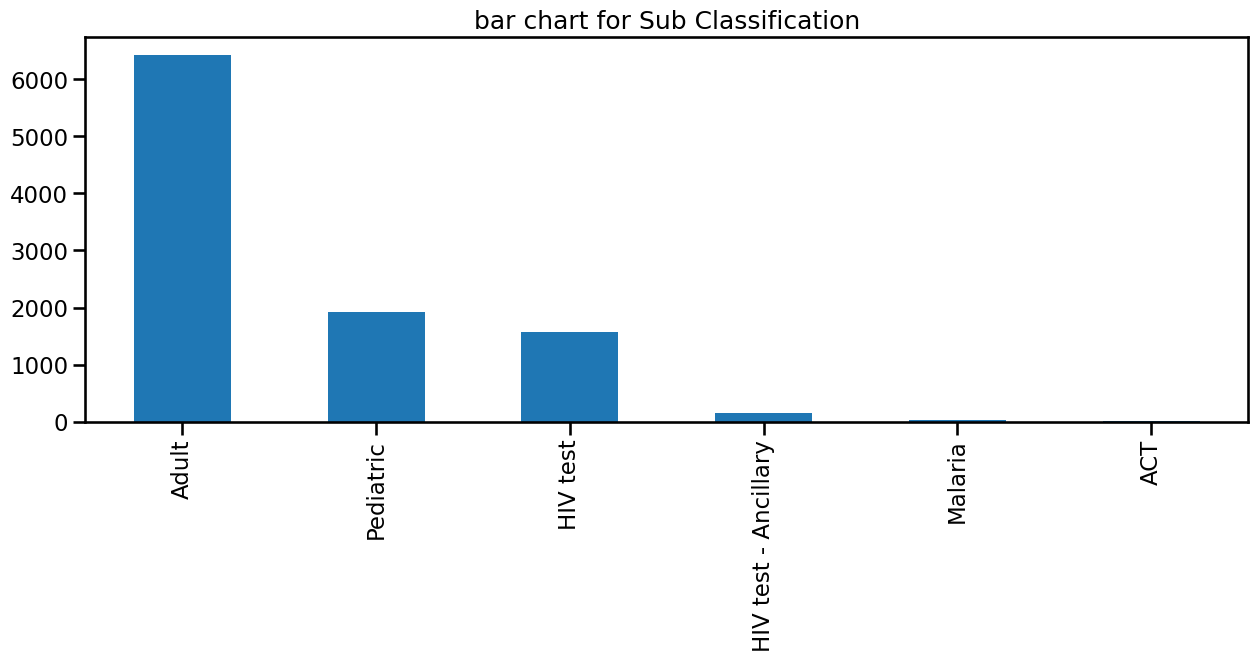

In [ ]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

In [ ]:
other_class=df["sub_classification"].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key) 

In [ ]:
df["sub_classification"]=df["sub_classification"].replace(HIV_plus,"HIV+")

In [ ]:
df["sub_classification"].value_counts()

Adult        6418
Pediatric    1927
HIV+         1774
Name: sub_classification, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

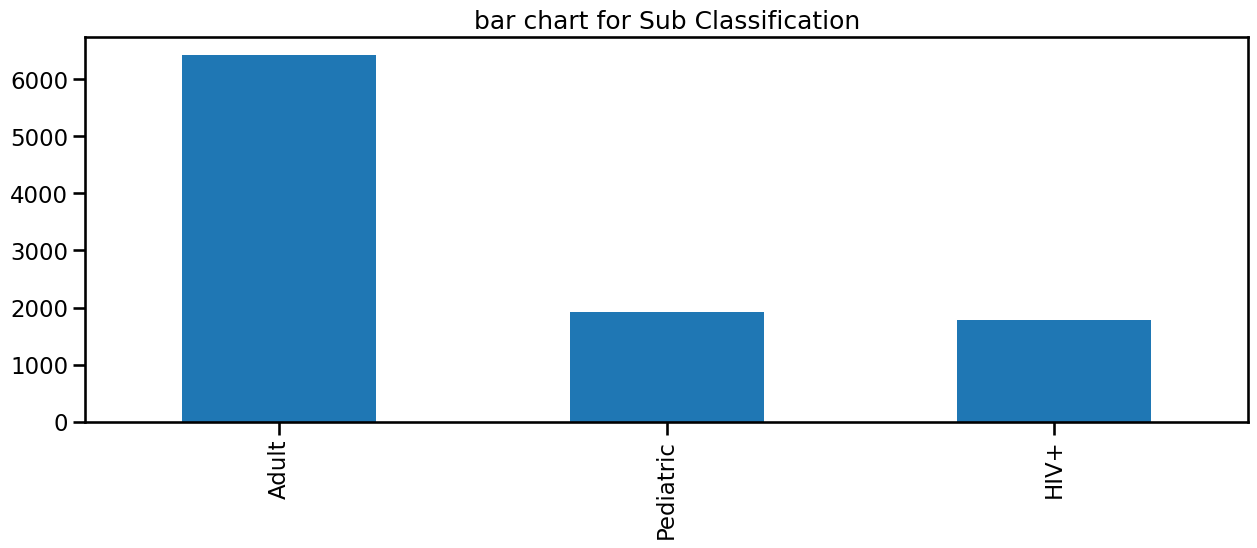

In [ ]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

##vendor

In [ ]:
df["vendor"].value_counts().head()

SCMS from RDC               5199
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: vendor, dtype: int64

In [ ]:
df["vendor"].value_counts().tail()

BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)    1
OMEGA DIAGNOSTICS LTD                           1
PLURIPHARM S.A.                                 1
CENTRAL PHARMACEUTICAL COMPANY NO. 1            1
AUROBINDO PHARAM (SOUTH AFRICA)                 1
Name: vendor, dtype: int64

In [ ]:
df["vendor"].value_counts(normalize=True).head()

SCMS from RDC               0.513786
Orgenics, Ltd               0.074513
S. BUYS WHOLESALER          0.070659
Aurobindo Pharma Limited    0.066014
Trinity Biotech, Plc        0.035181
Name: vendor, dtype: float64

Similar to the above category, this feature also has one category about 50% + of the total. So lets group the vendor by `SCMS from RSC` and `others`

In [ ]:
other_vendor=df["vendor"].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key)  

In [ ]:
df["vendor"]=df["vendor"].replace(other_catv,"other")

Text(0.5, 1.0, 'bar chart for vendor column')

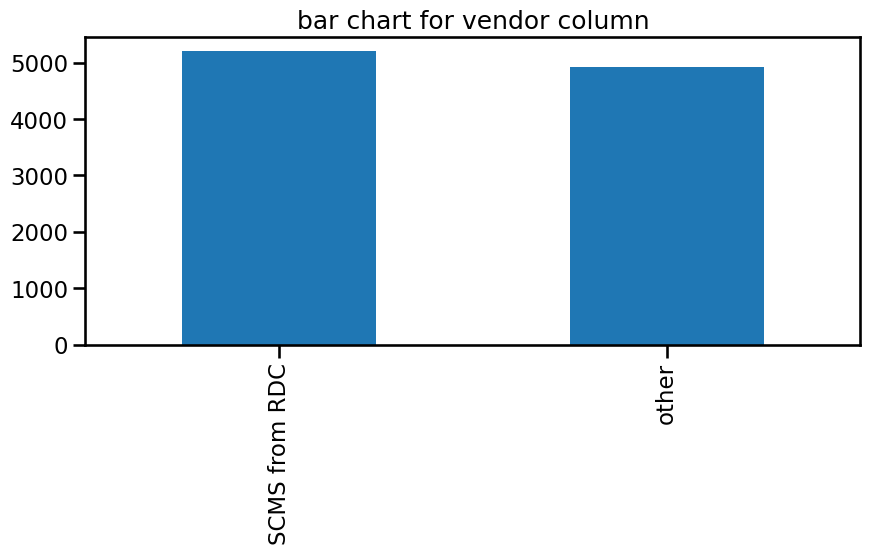

In [ ]:
plt.figure(figsize=(10,4))
df["vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [ ]:
df["vendor"].value_counts(normalize=True)

SCMS from RDC    0.513786
other            0.486214
Name: vendor, dtype: float64

##item_description

In [ ]:
df['item_description'].value_counts().head()

Efavirenz 600mg, tablets, 30 Tabs                                   733
Nevirapine 200mg, tablets, 60 Tabs                                  605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    554
Name: item_description, dtype: int64

In [ ]:
df["item_description"].value_counts().tail()

Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs    1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                     1
Malaria Antigen P.f Kit, 30 x 1 Test                                             1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml    1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                            1
Name: item_description, dtype: int64

This feature won;t contribute in the model building as it has no specific categories. So its better to drop it.

In [ ]:
df.drop("item_description",axis=1,inplace=True)

##molecule/test_type

In [ ]:
df["molecule/test_type"].value_counts().head()

Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
Name: molecule/test_type, dtype: int64

In [ ]:
df["molecule/test_type"].value_counts().tail()

Mefloquine (as hydrochloride)       1
Quinine (as sulfate)                1
Primaquine base (as diphosphate)    1
Lamivudine/Zidovudine+Abacavir      1
Nelfinavir                          1
Name: molecule/test_type, dtype: int64

Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.

In [ ]:
df.drop("molecule/test_type",axis=1,inplace=True)

##brand

In [ ]:
df["brand"].value_counts().head()

Generic      7098
Determine     799
Uni-Gold      373
Aluvia        250
Kaletra       161
Name: brand, dtype: int64

In [ ]:
df["brand"].value_counts().tail()

Bundi          2
InstantCHEK    2
Pepti-LAV      1
Visitect       1
CareStart      1
Name: brand, dtype: int64

In [ ]:
df["brand"].value_counts(normalize=True).head()

Generic      0.701453
Determine    0.078960
Uni-Gold     0.036861
Aluvia       0.024706
Kaletra      0.015911
Name: brand, dtype: float64

As generic category has most count i.e. almost 70%, so its better to categorize the brand feature into two types. `Generic` and `other`

In [ ]:
other_brand=df["brand"].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=1000:
        other_catb.append(key)  

In [ ]:
df["brand"]=df["brand"].replace(other_catb,"other")

In [ ]:
def barplot(df,cols):
    plt.figure(figsize=(8,4))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

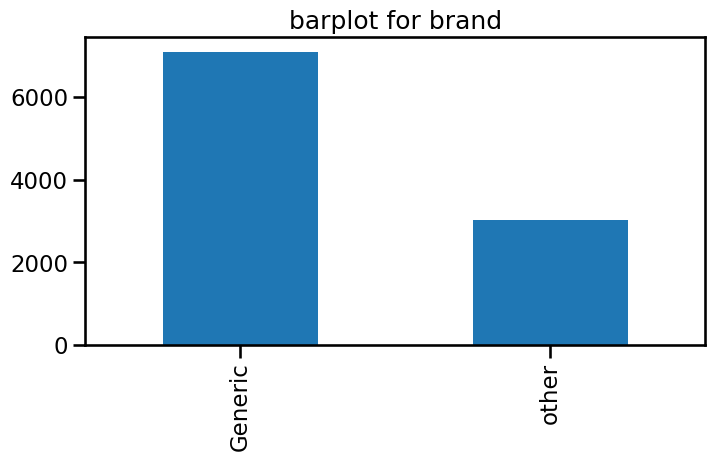

In [ ]:
barplot(df["brand"],"brand")

##dosage_form

In [ ]:
df["dosage_form"].value_counts().head()

Tablet           3462
Tablet - FDC     2659
Test kit         1575
Oral solution     712
Capsule           706
Name: dosage_form, dtype: int64

In [ ]:
df["dosage_form"].value_counts().tail()

Tablet - FDC + co-blister    20
Tablet - FDC + blister       15
Tablet - blister             10
Injection                     6
Oral powder                   1
Name: dosage_form, dtype: int64

In [ ]:
def barplot(df,cols):
    plt.figure(figsize=(25,10))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

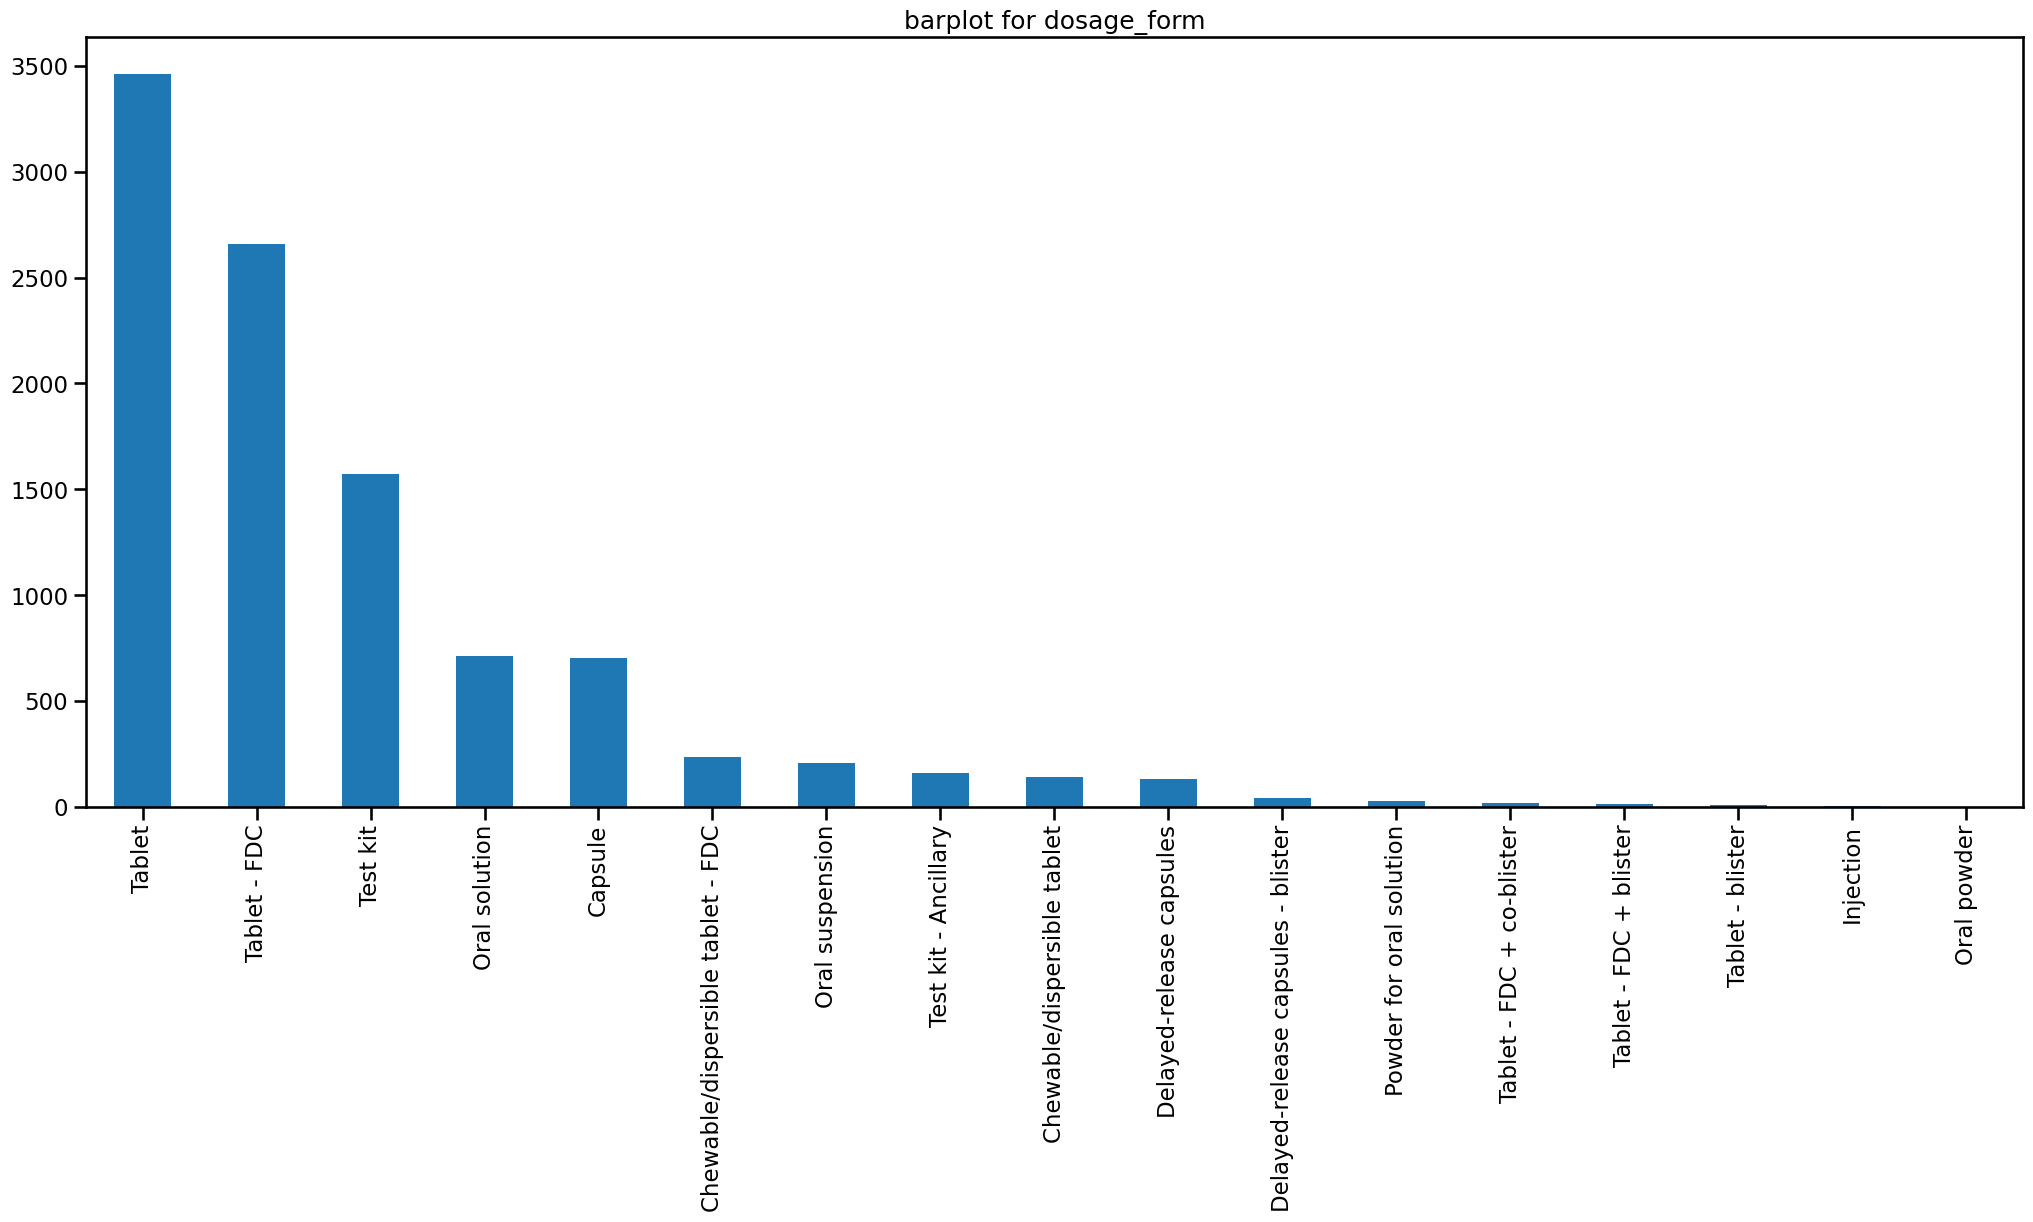

In [ ]:
barplot(df["dosage_form"],"dosage_form")

This feature is dependent on the `dosage` feature. And as we have already dropped it. So lets drop this too.

In [ ]:
df.drop('dosage_form',axis=1,inplace=True)

##unit_of_measure_(per_pack)

In [ ]:
df["unit_of_measure_(per_pack)"].value_counts()

60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: unit_of_measure_(per_pack), dtype: int64

##line_item_quantity

In [ ]:
df["line_item_quantity"].value_counts().head()

10000    93
1000     91
100      85
2000     73
5000     69
Name: line_item_quantity, dtype: int64

In [ ]:
df["line_item_quantity"].value_counts().tail()

2064     1
38113    1
32070    1
9935     1
36639    1
Name: line_item_quantity, dtype: int64

##manufacturing_site

In [ ]:
df["manufacturing_site"].value_counts().head()

Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Name: manufacturing_site, dtype: int64

In [ ]:
df["manufacturing_site"].value_counts().tail()

BUNDI INTERNATIONAL DIAGNOSTICS LTD    1
Remedica, Limassol, Cyprus             1
OMEGA Diagnostics, UK                  1
ABBSP                                  1
Medochemie Factory A, CY               1
Name: manufacturing_site, dtype: int64

manufacturing_site
Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          215
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

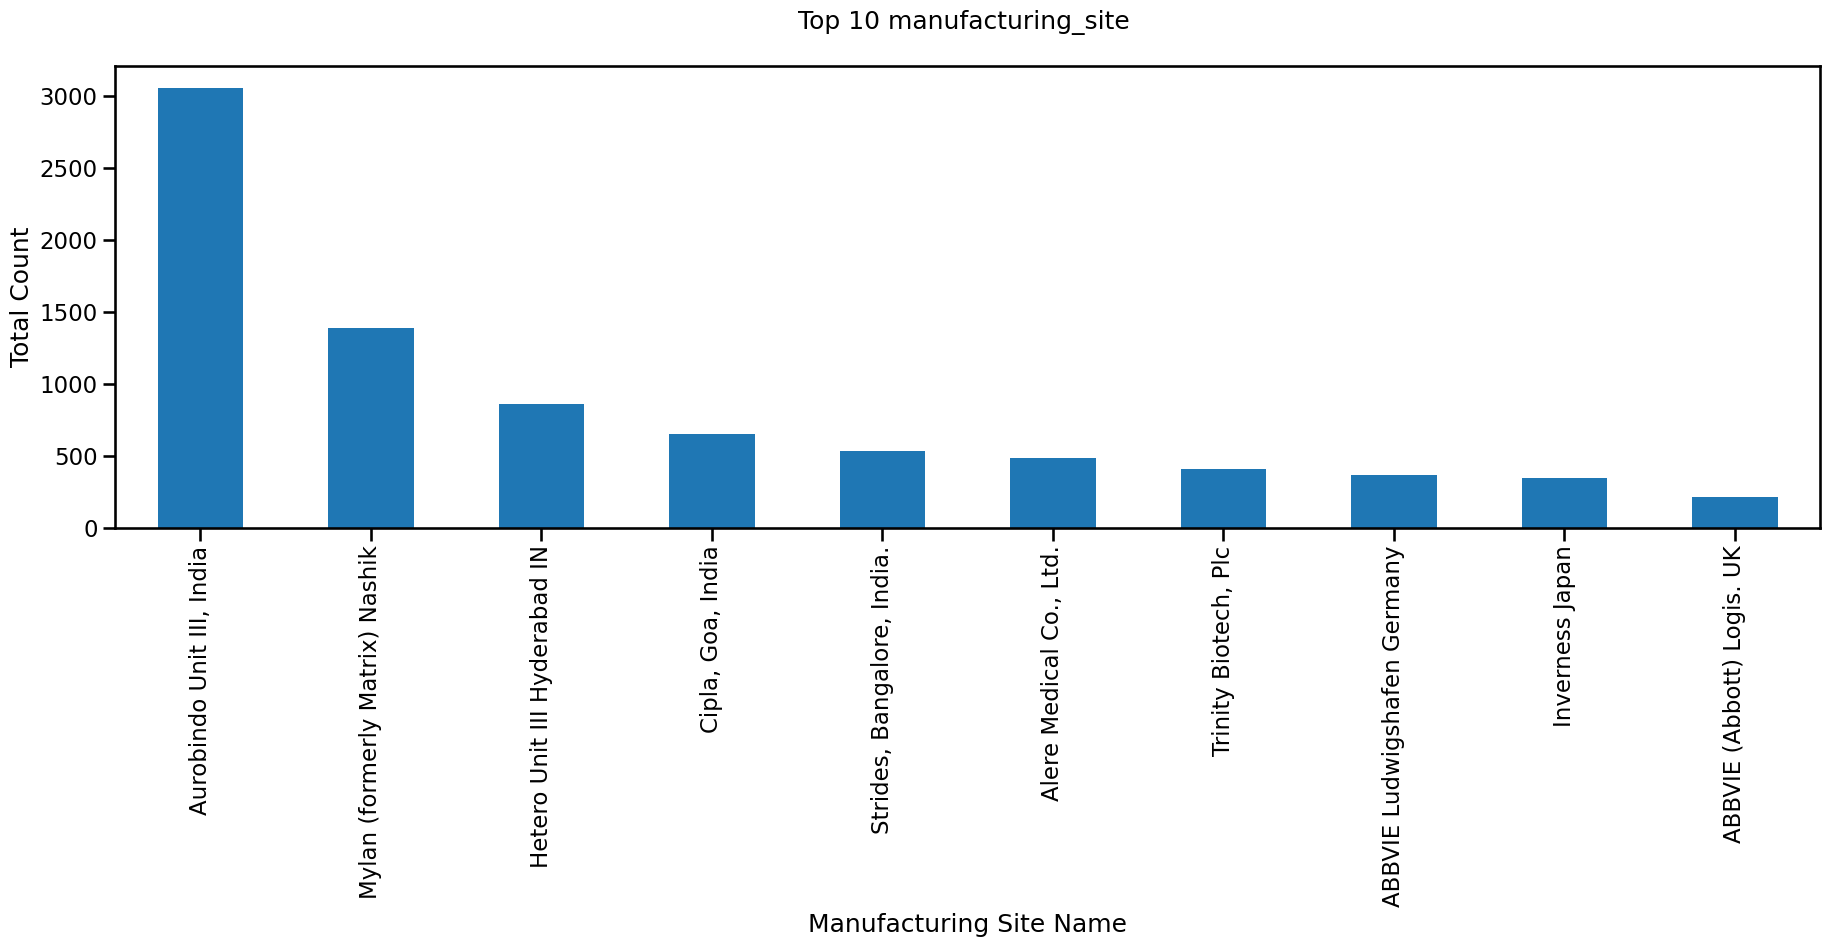

In [ ]:
plt.figure(figsize=(22,6))
TopManufacturingSite=df.groupby('manufacturing_site').size().nlargest(10)
print(TopManufacturingSite)
TopManufacturingSite.plot(kind='bar')
plt.title('Top 10 manufacturing_site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [ ]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=500:
        other_cat.append(key)  

In [ ]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

<Axes: >

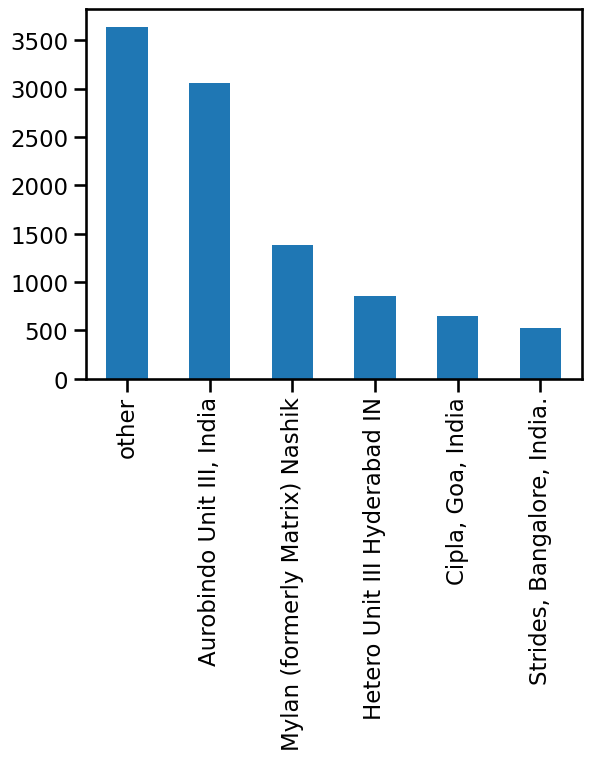

In [ ]:
df["manufacturing_site"].value_counts().plot.bar()

##first_line_designation

In [ ]:
df["first_line_designation"].value_counts()

Yes    6876
No     3243
Name: first_line_designation, dtype: int64

In [ ]:
np.round(df["first_line_designation"].value_counts(normalize=True)*100,2)

Yes    67.95
No     32.05
Name: first_line_designation, dtype: float64

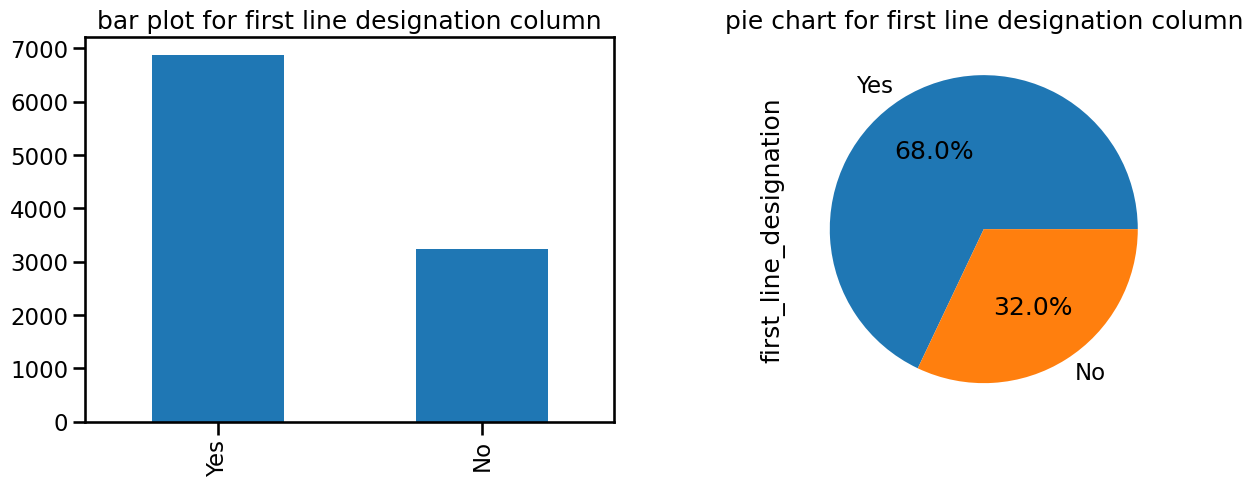

In [ ]:
plot(df["first_line_designation"],"first line designation")

##weight_(kilograms)

In [ ]:
df["weight_(kilograms)"].value_counts().head(10)

Weight Captured Separately    1499
2                               29
6                               26
1                               21
5                               20
60                              20
4                               18
3                               18
9                               17
14                              17
Name: weight_(kilograms), dtype: int64

In [ ]:
df["weight_(kilograms)"].value_counts().tail()

See DN-667 (ID#:10967)    1
2018                      1
7349                      1
5009                      1
1392                      1
Name: weight_(kilograms), dtype: int64

In [ ]:
df.drop("weight_(kilograms)",axis=1,inplace=True)

##freight_cost_(usd)

In [ ]:
df["freight_cost_(usd)"].value_counts().head()

Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
Name: freight_cost_(usd), dtype: int64

In [ ]:
df["freight_cost_(usd)"].value_counts().tail()

1025.37                    1
35569.75                   1
4139.95                    1
8256.97                    1
See DN-4282 (ID#:83919)    1
Name: freight_cost_(usd), dtype: int64

In [ ]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [ ]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].apply(trans_freight_cost)

In [ ]:
df["freight_cost_(usd)"].value_counts().head()

0           1671
9736.1        36
6147.18       27
13398.06      16
7329.83       12
Name: freight_cost_(usd), dtype: int64

In [ ]:
df["freight_cost_(usd)"].describe()

count     7725
unique    5343
top          0
freq      1671
Name: freight_cost_(usd), dtype: int64

In [ ]:
df.isna().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
pq_first_sent_to_client_date       0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
brand                              0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2394
shipment_mode                      0
line_item_insurance_(usd)          0
dtype: int64

Need to replace the missing values (nan) with medain

In [ ]:
median_value=df["freight_cost_(usd)"].median()
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace(np.nan,median_value)
df["freight_cost_(usd)"].head()

0      780.34
1      4521.5
2     1653.78
3    16007.06
4    45450.08
Name: freight_cost_(usd), dtype: object

In [ ]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].astype("float")

Description of freight_cost_(usd)
----------------------------------------------------------------------------
count     10119.000000
mean       7536.104702
std       13156.759791
min           0.000000
25%        1211.490000
50%        3526.690000
75%        7783.400000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Skewness of freight_cost_(usd)
----------------------------------------------------------------------------
5.6617

 Histogram and Boxplot of freight_cost_(usd)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


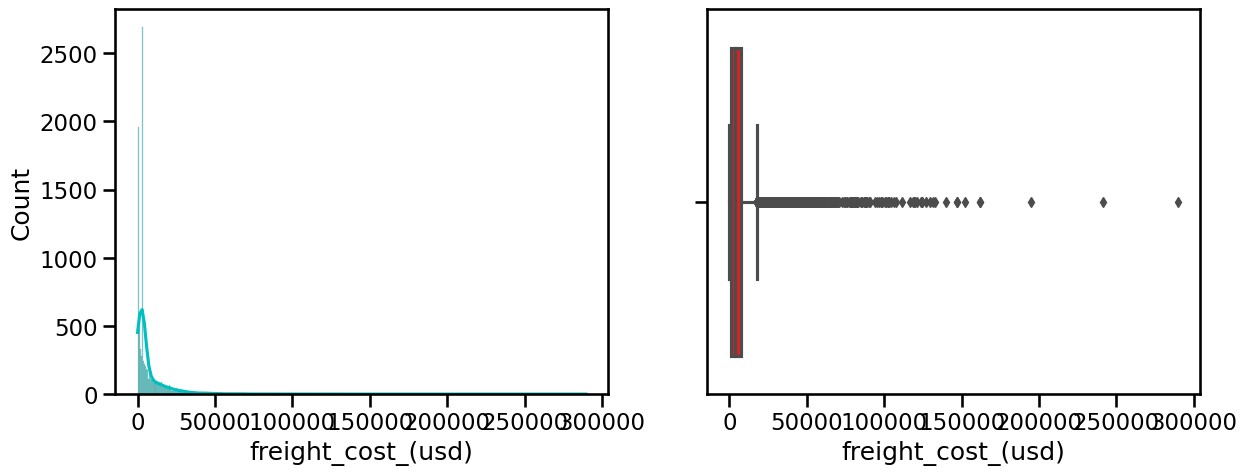

In [ ]:
univariateAnalysis_numeric('freight_cost_(usd)',100)

In [ ]:
df["shipment_mode"].value_counts()

Air            6367
Truck          2764
Air Charter     618
Ocean           370
Name: shipment_mode, dtype: int64

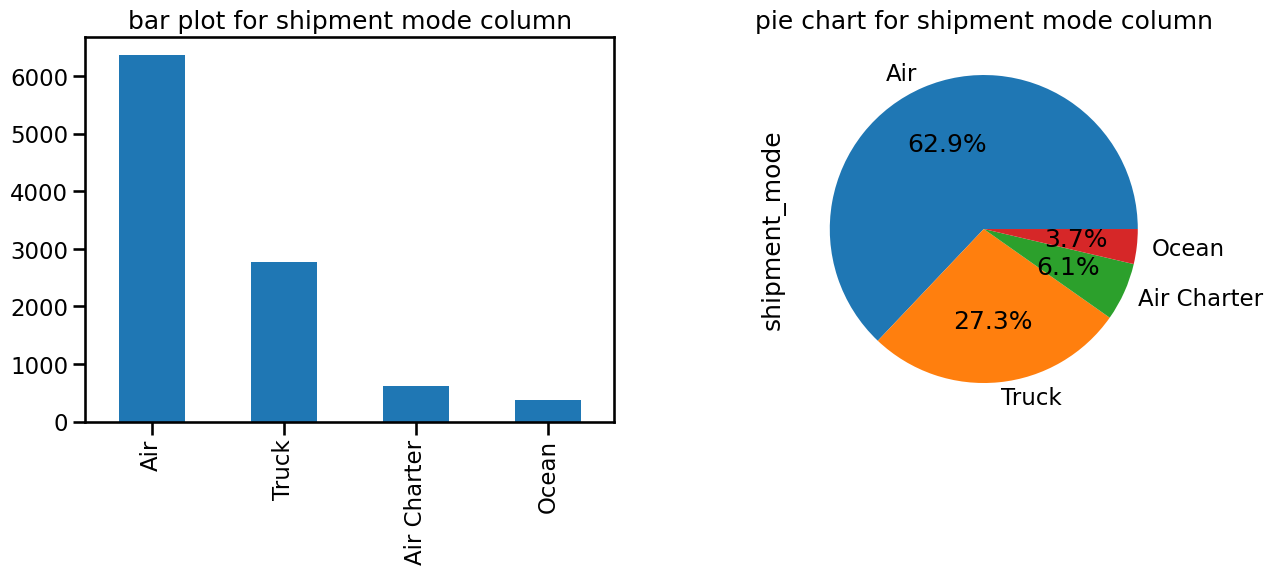

In [ ]:
plot(df["shipment_mode"],"shipment mode")

##line_item_insurance_(usd)

In [ ]:
df["line_item_insurance_(usd)"].value_counts().head()

47.04    289
0.00      44
0.02      34
0.07      32
0.05      30
Name: line_item_insurance_(usd), dtype: int64

In [ ]:
df["line_item_insurance_(usd)"].describe()

count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

Description of line_item_insurance_(usd)
----------------------------------------------------------------------------
count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

 Skewness of line_item_insurance_(usd)
----------------------------------------------------------------------------
4.7828

 Histogram and Boxplot of line_item_insurance_(usd)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


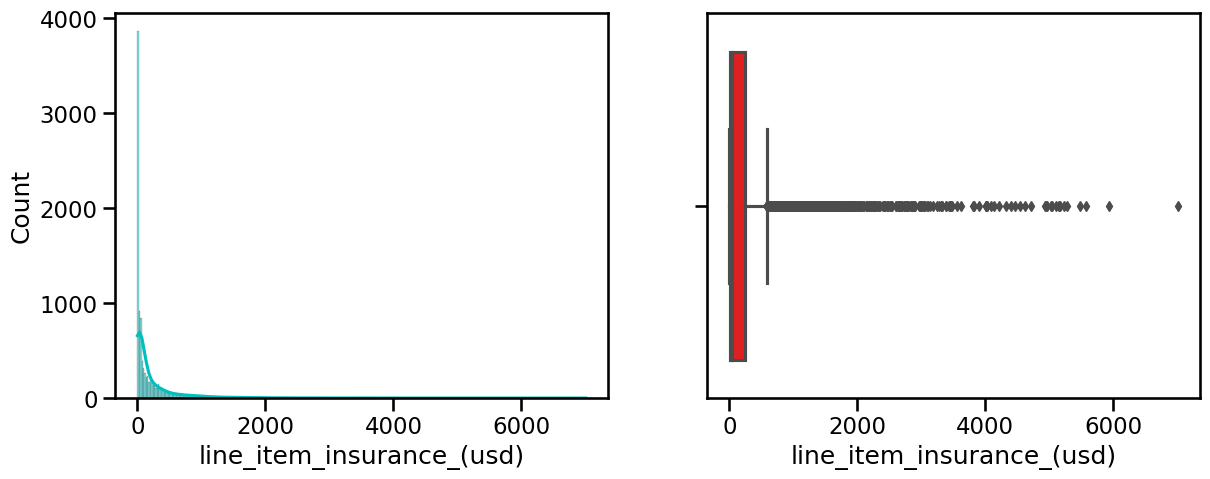

In [ ]:
univariateAnalysis_numeric("line_item_insurance_(usd)",60)

##delivery_recorded_date

In [ ]:
df['delivery_recorded_date']=pd.to_datetime(df['delivery_recorded_date'])
df['pq_first_sent_to_client_date']=pd.to_datetime(df['pq_first_sent_to_client_date'])

In [ ]:
#calculating total no of days to process the delivery
df["days_to_process"]=df["delivery_recorded_date"]-df["pq_first_sent_to_client_date"]
df["days_to_process"].head(5)

0   -1095 days
1    -930 days
2   -1009 days
3   -1004 days
4   -1025 days
Name: days_to_process, dtype: timedelta64[ns]

In [ ]:
df['days_to_process'] = df['days_to_process'].dt.days.astype('int64')

Description of days_to_process
----------------------------------------------------------------------------
count    10119.000000
mean        34.950588
std        283.391941
min      -1126.000000
25%        -31.000000
50%        113.000000
75%        205.000000
max        726.000000
Name: days_to_process, dtype: float64

 Skewness of days_to_process
----------------------------------------------------------------------------
-1.3766

 Histogram and Boxplot of days_to_process
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


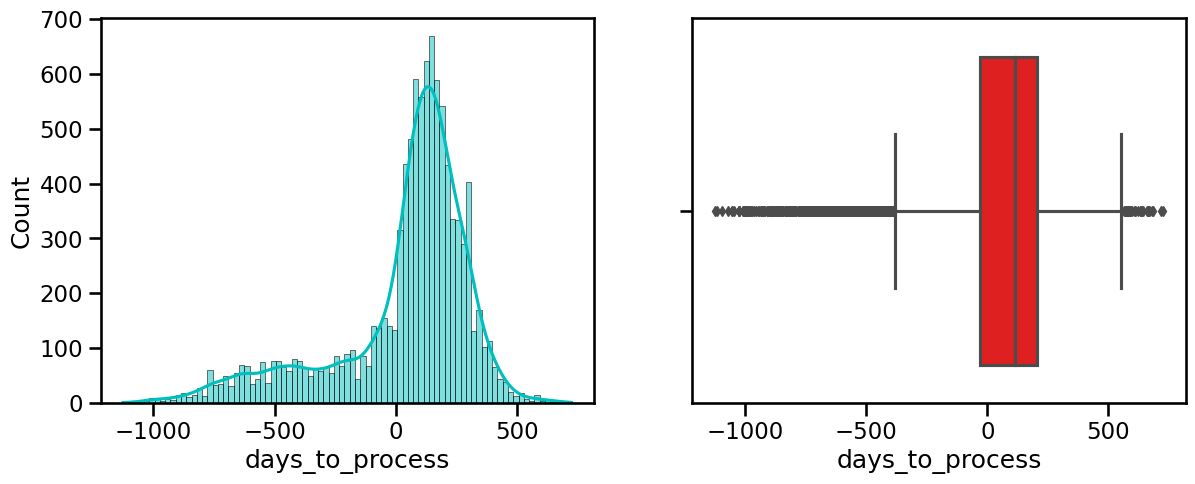

In [ ]:
univariateAnalysis_numeric('days_to_process',60)

In [ ]:
df.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date","delivered_to_client_date"],axis=1,inplace=True)

In [ ]:
df.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,product_group,sub_classification,vendor,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,other,HIV+,other,other,30,19,551.0,29.00,0.97,other,Yes,780.34,Air,47.04,-1095
1,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Pediatric,other,Generic,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,Air,47.04,-930
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,others,other,HIV+,other,other,100,500,40000.0,80.00,0.80,other,Yes,1653.78,Air,47.04,-1009
3,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Adult,other,Generic,60,31920,127360.8,3.99,0.07,other,Yes,16007.06,Air,47.04,-1004
4,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Adult,other,Generic,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,Air,47.04,-1025


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10119 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   10119 non-null  object 
 1   asn/dn_#                    10119 non-null  object 
 2   country                     10119 non-null  object 
 3   fulfill_via                 10119 non-null  object 
 4   vendor_inco_term            10119 non-null  object 
 5   product_group               10119 non-null  object 
 6   sub_classification          10119 non-null  object 
 7   vendor                      10119 non-null  object 
 8   brand                       10119 non-null  object 
 9   unit_of_measure_(per_pack)  10119 non-null  int64  
 10  line_item_quantity          10119 non-null  int64  
 11  line_item_value             10119 non-null  float64
 12  pack_price                  10119 non-null  float64
 13  unit_price                  101

#Analysis w.r.t to Target Variable

In [ ]:
def Analysis_target(column,nbins):

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
    
    print(sns.barplot(x=df[column],y=df["line_item_value"], color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column],y=df["line_item_value"],ax=axs[1],color='r'))
    
    plt.show();

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


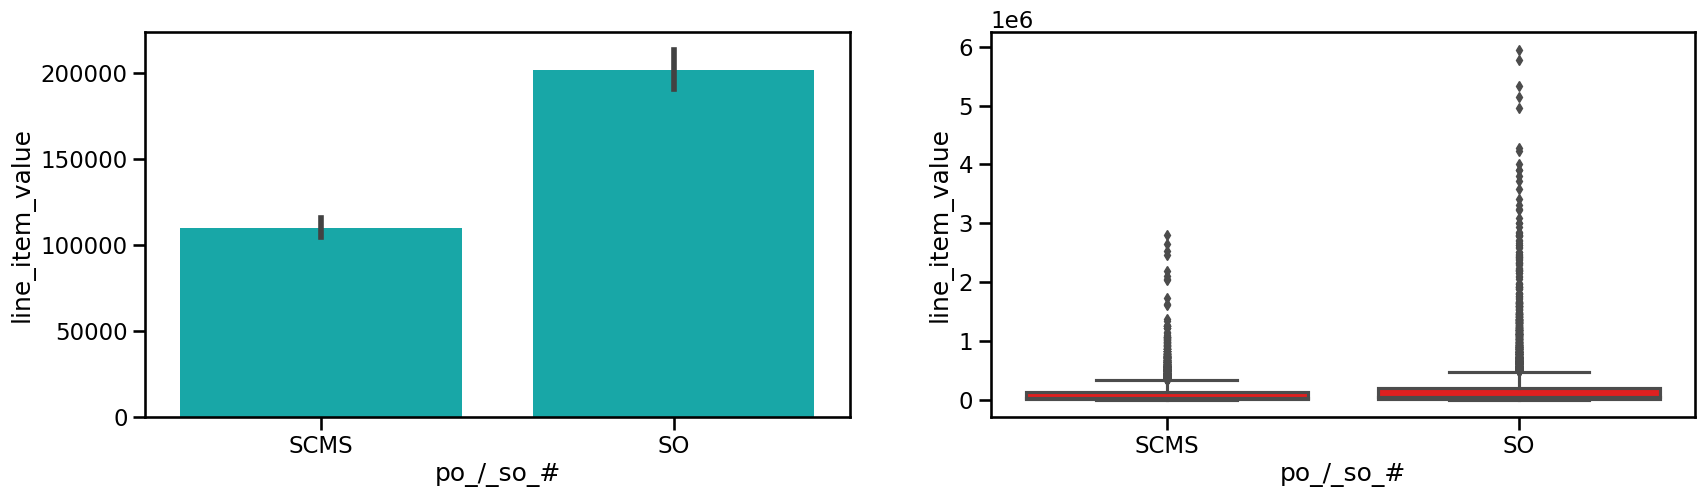

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


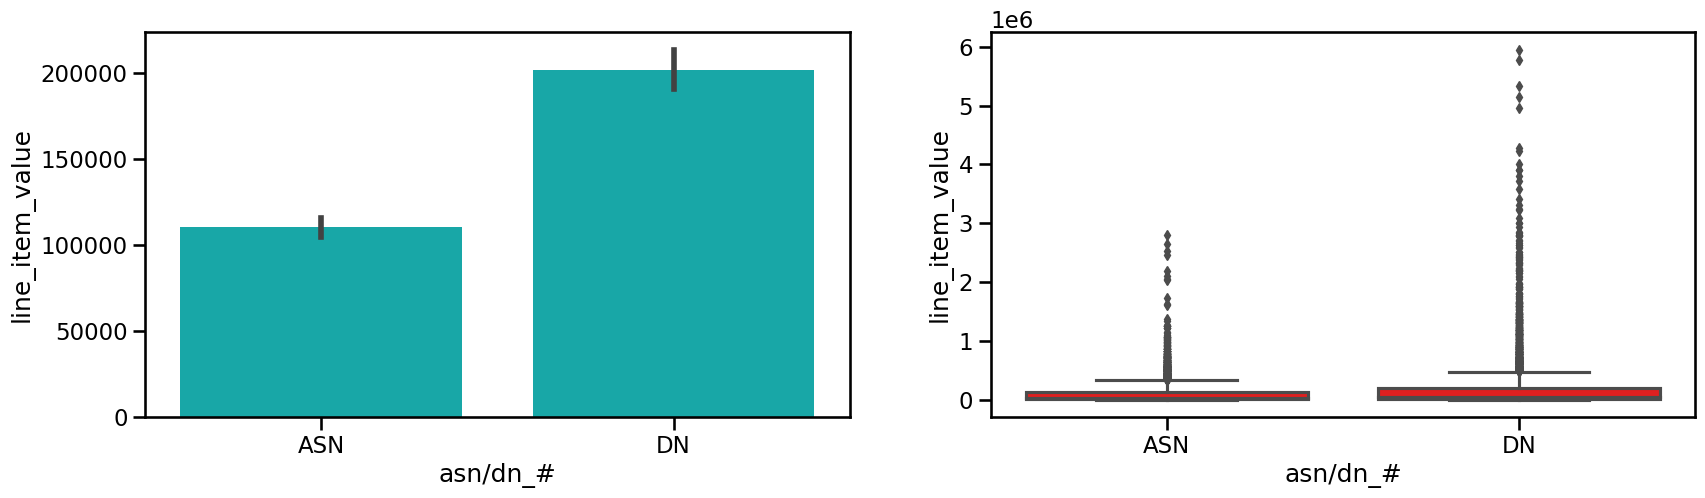

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


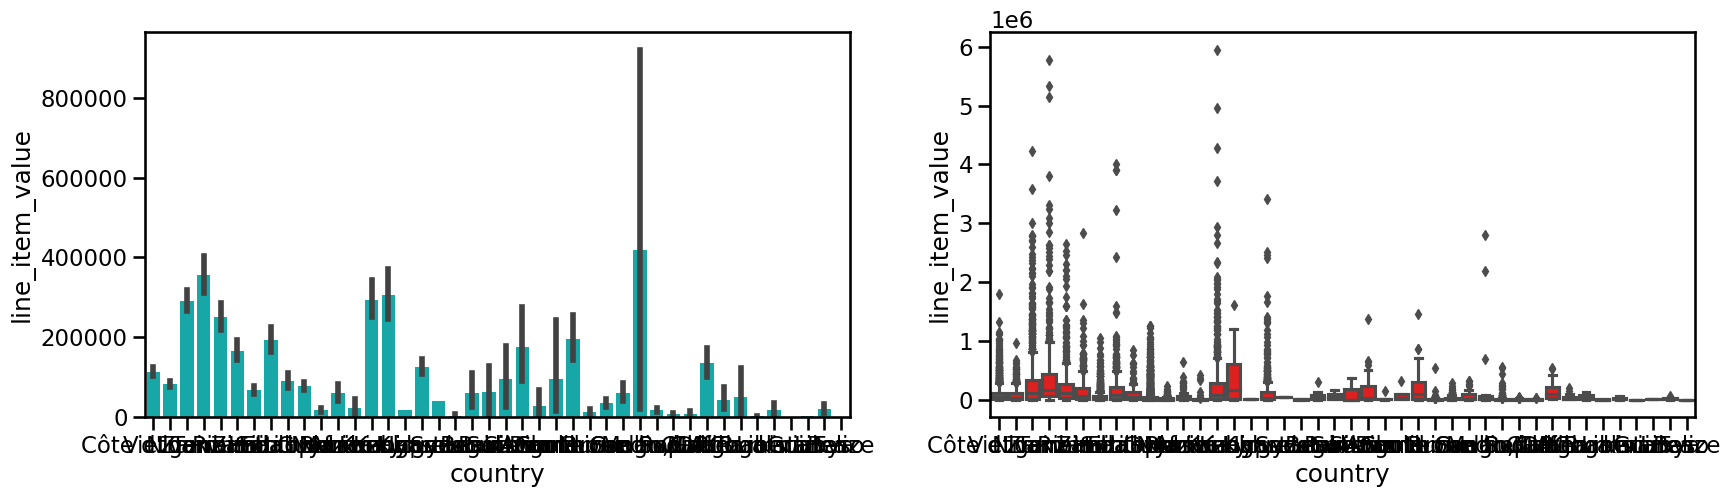

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


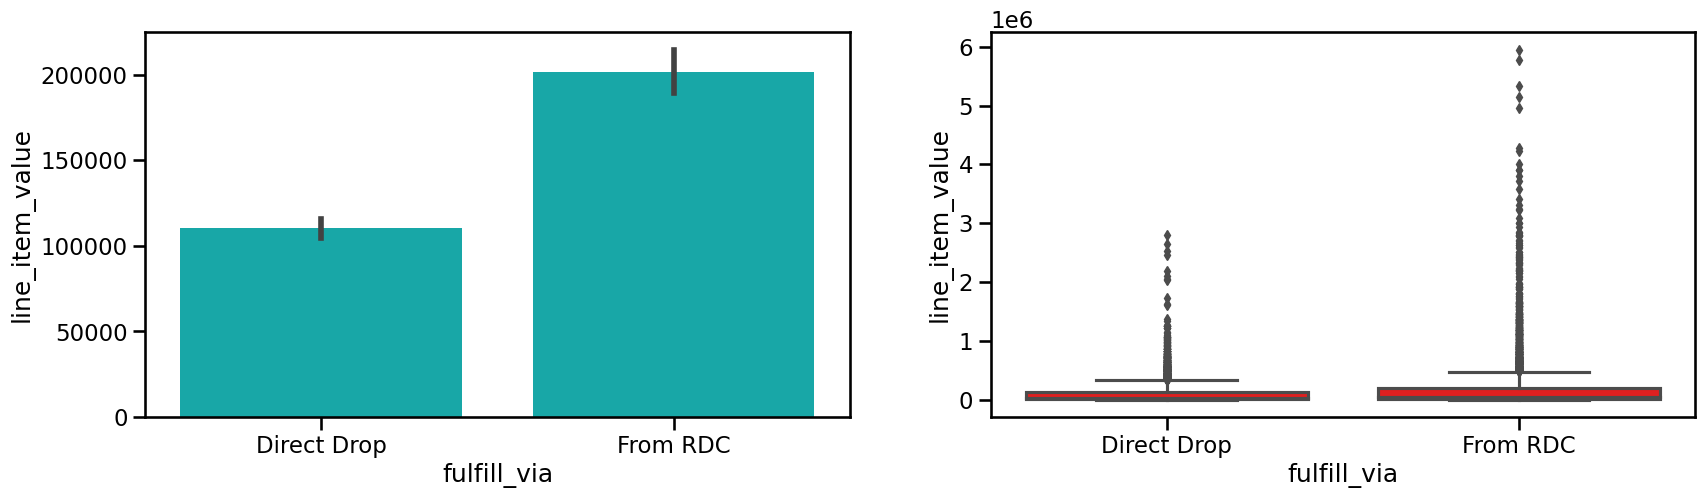

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


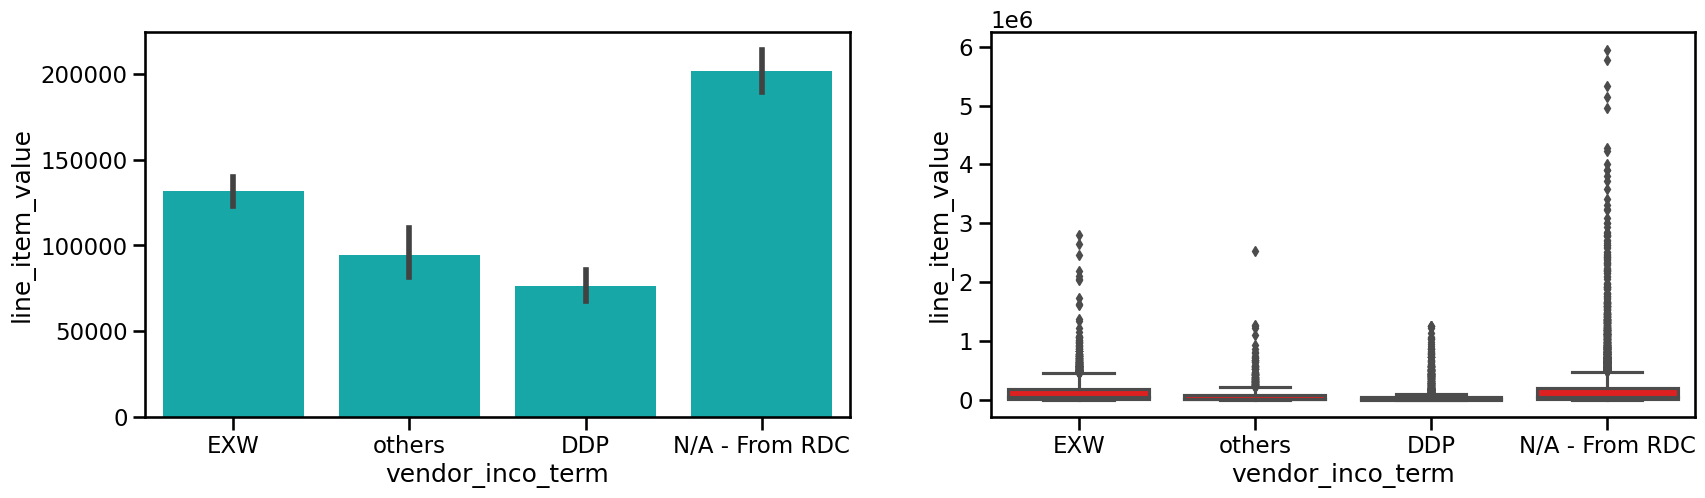

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


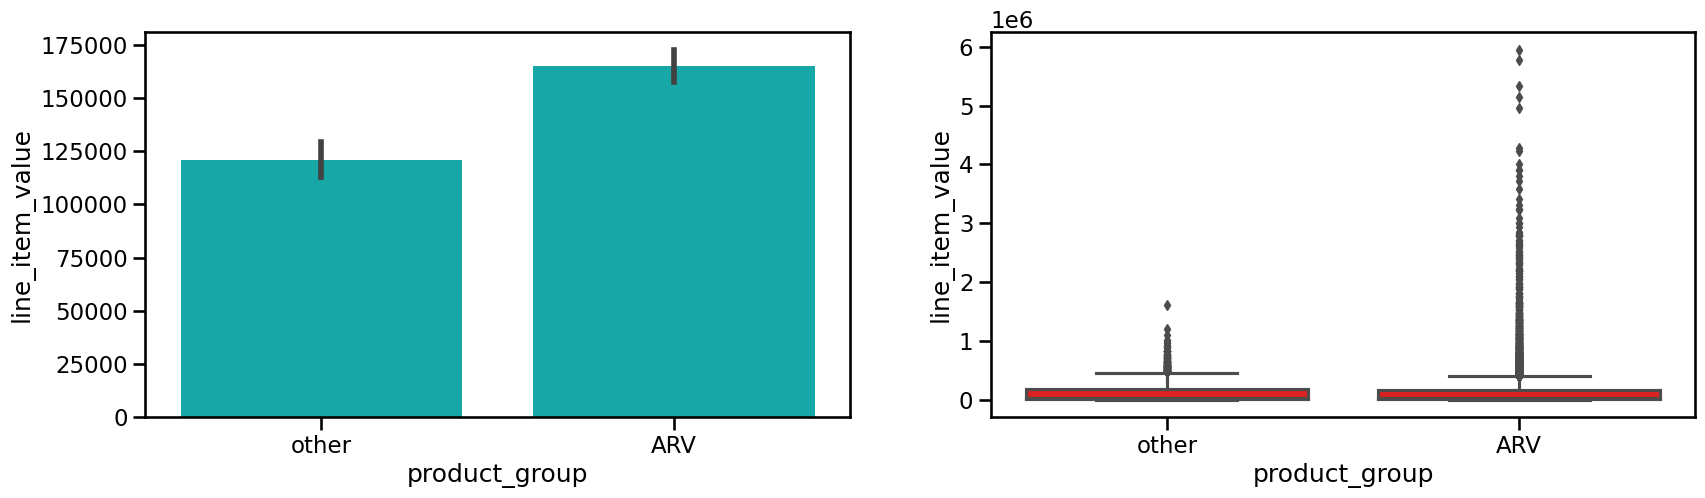

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


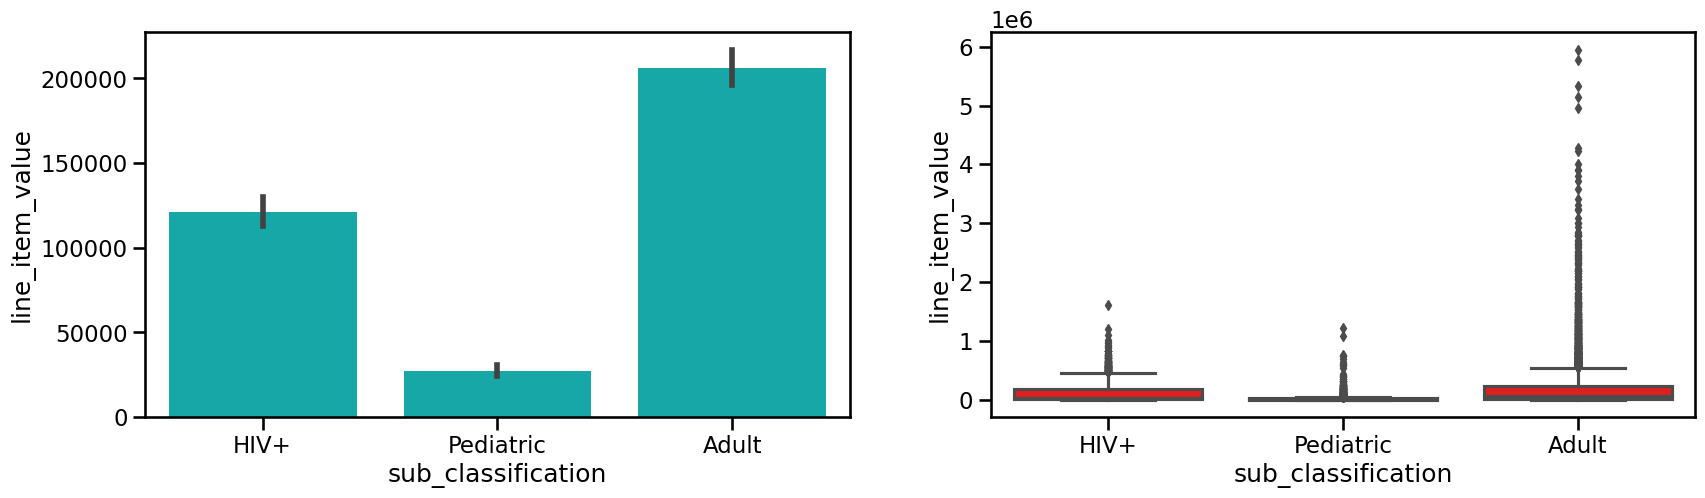

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


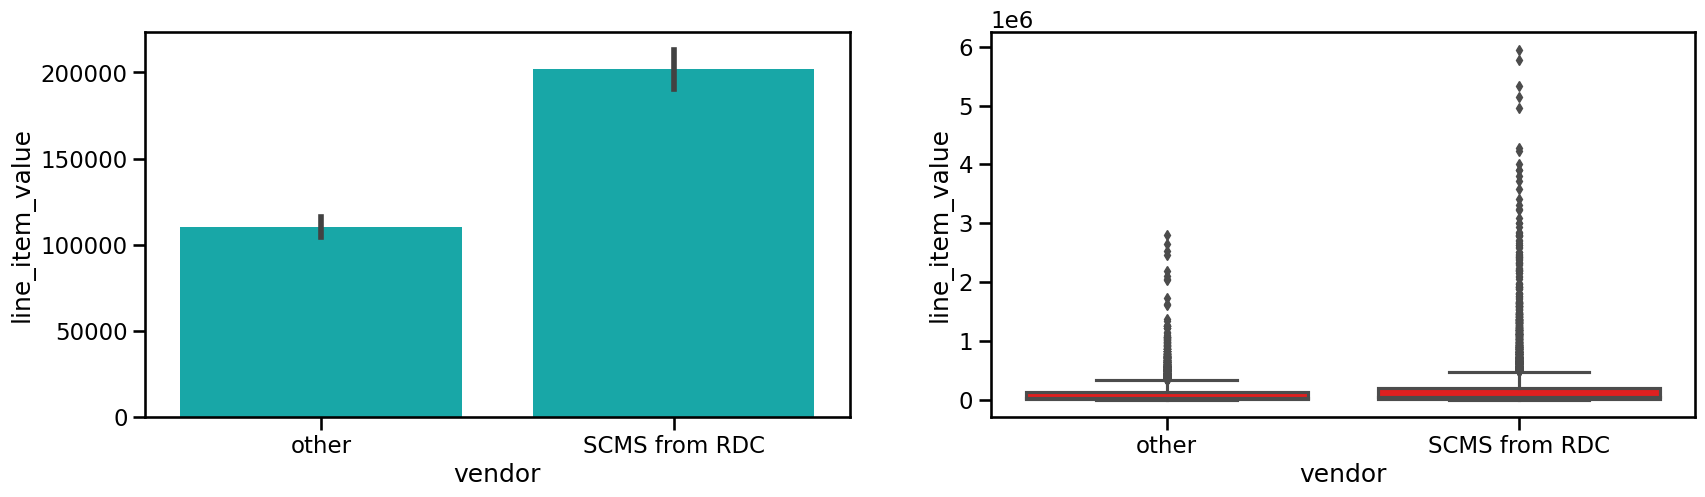

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


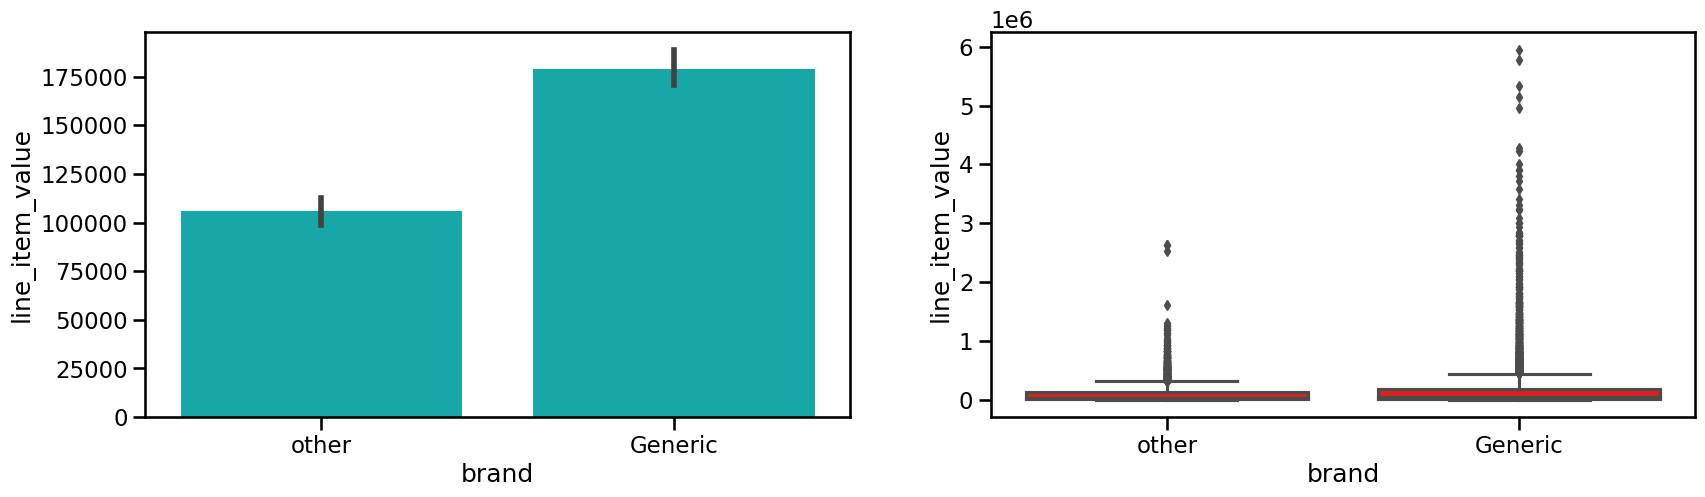

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


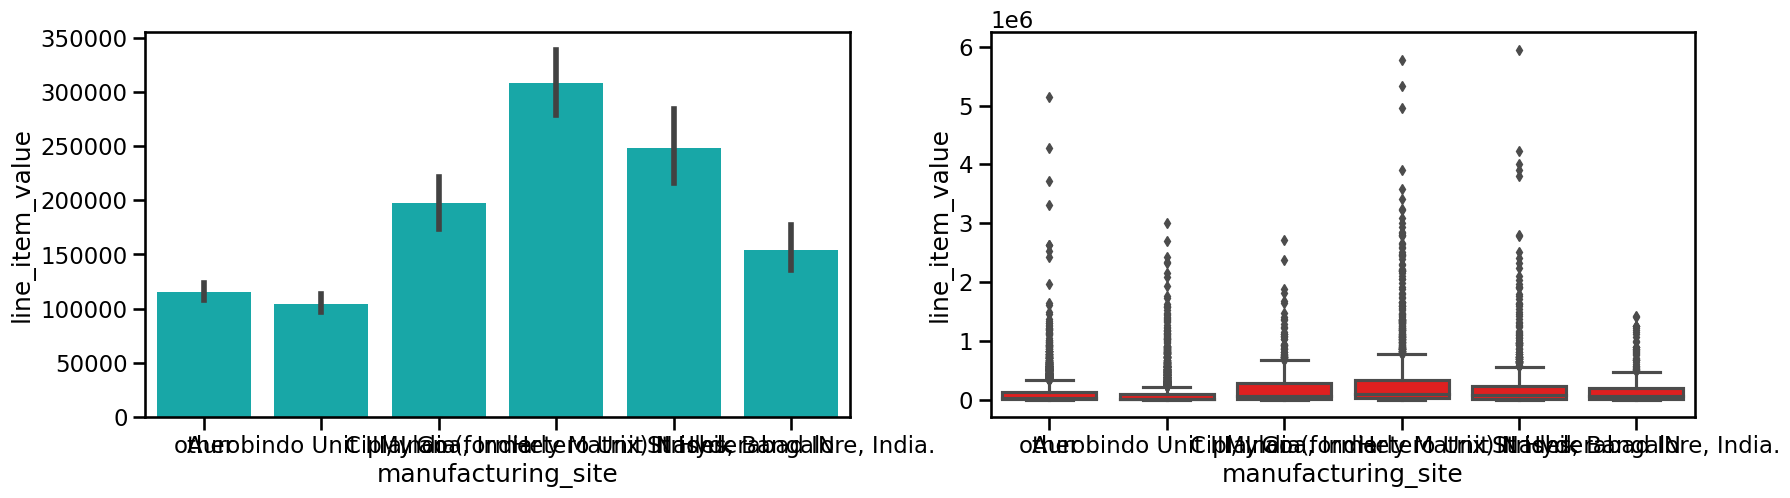

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


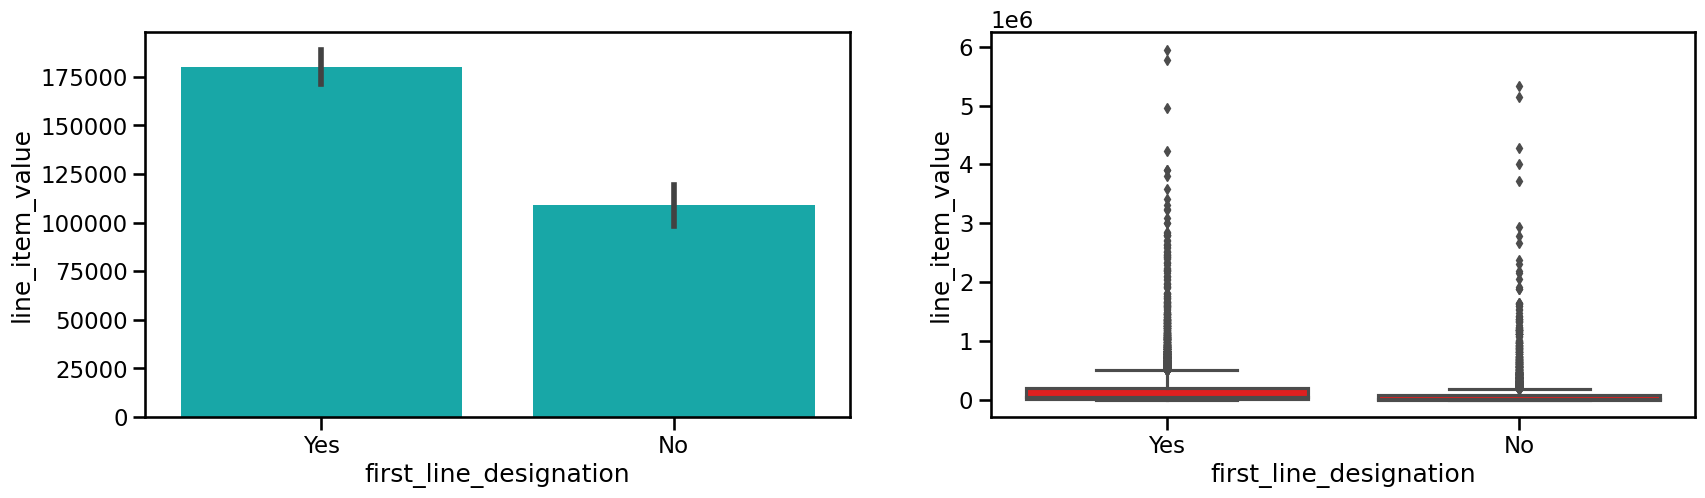

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


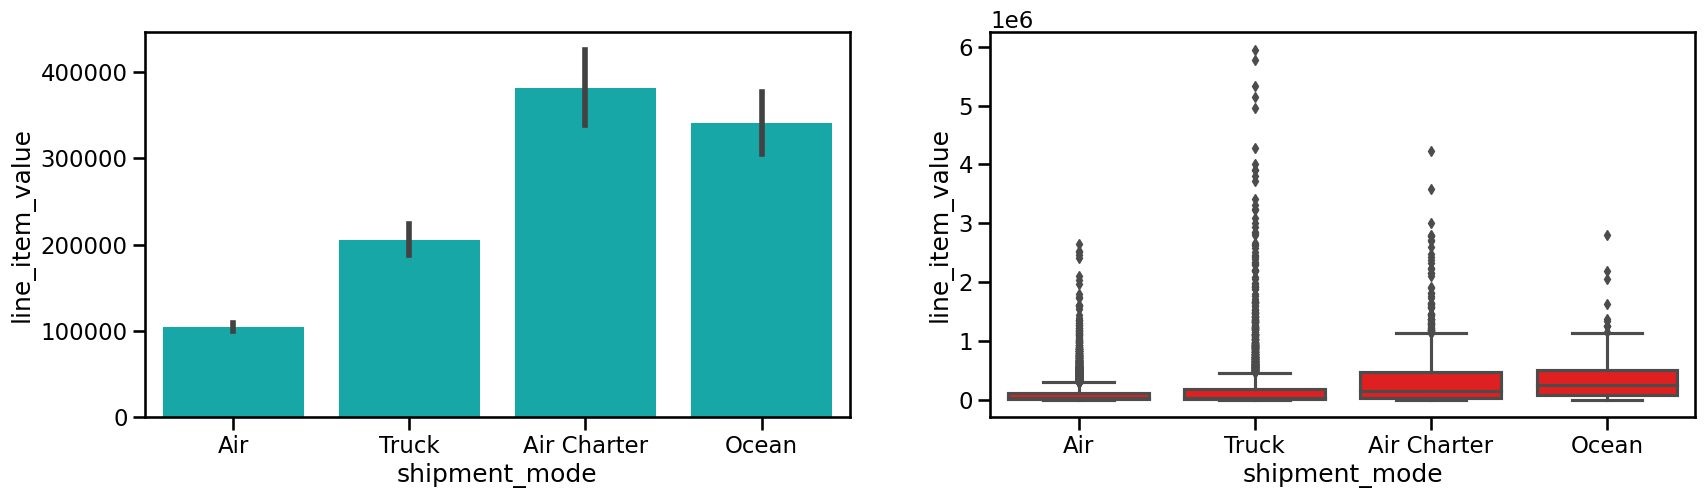

None


In [ ]:
for column in df.columns:
  if df[column].dtype == 'object':
      print(Analysis_target(column,30))

#### Visualizing Scatterplots w.r.t Target Variable


In [ ]:
def Scatterplots(column):
    fig,axs = plt.subplots(figsize=(8,5))
    sns.scatterplot(x=df[column],y=df["line_item_value"],color="orange")
    plt.show();

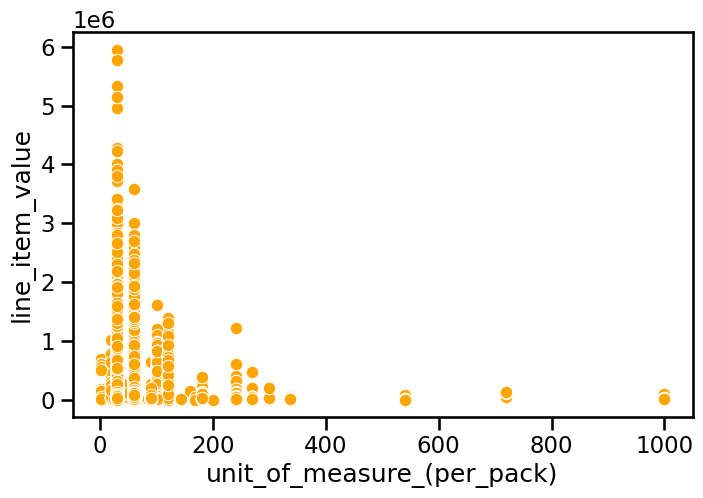

None


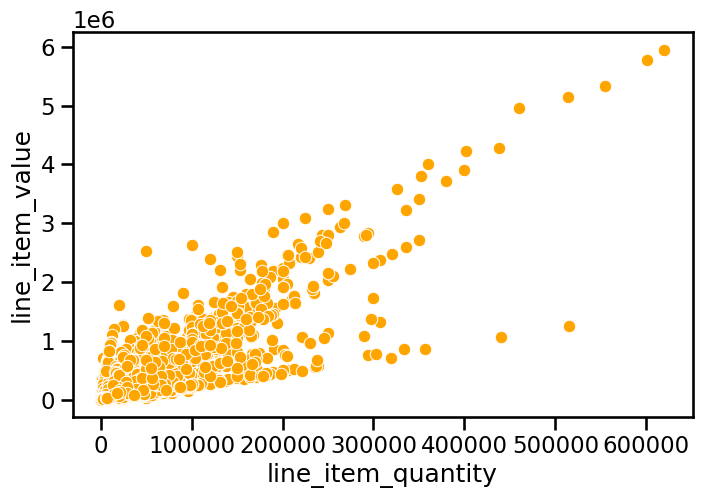

None


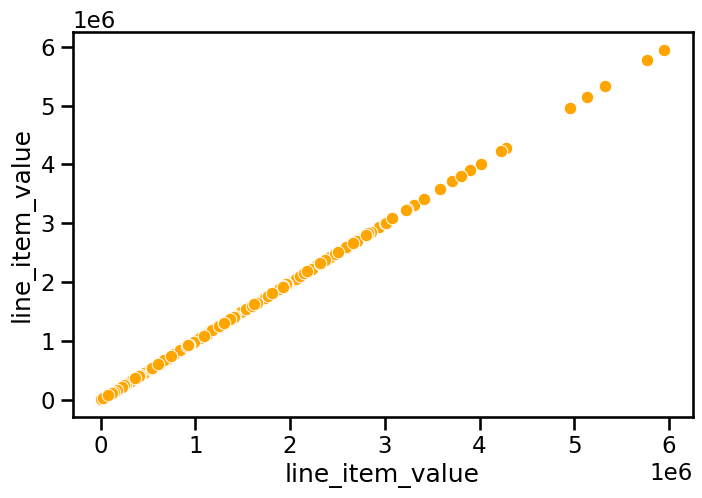

None


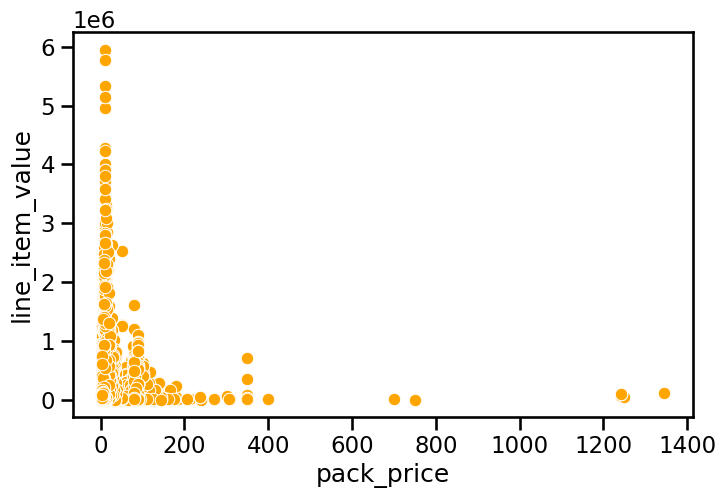

None


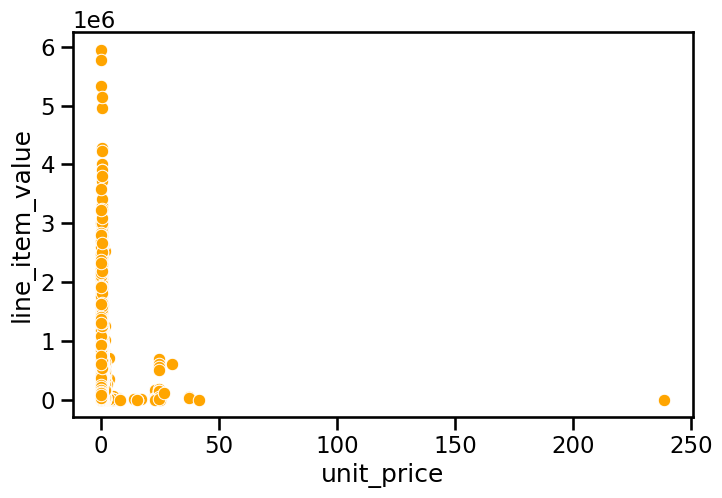

None


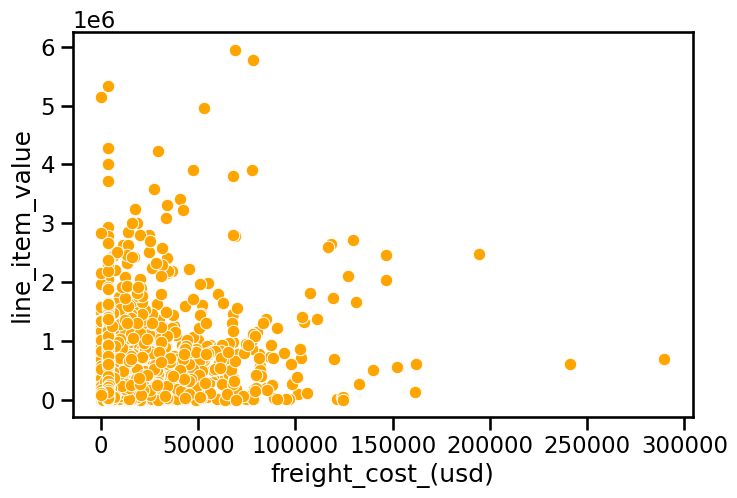

None


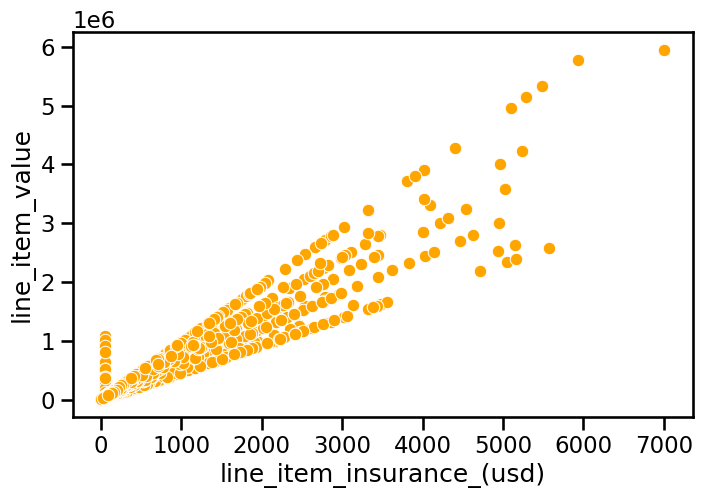

None


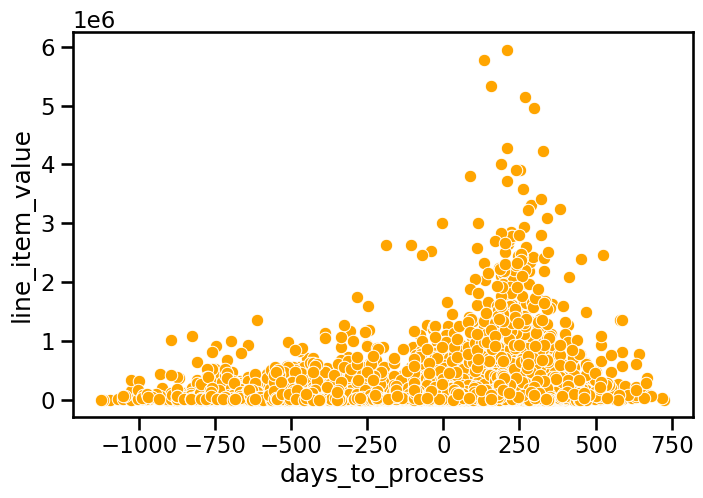

None


In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(Scatterplots(column))

#Dealing with Outliers

[]

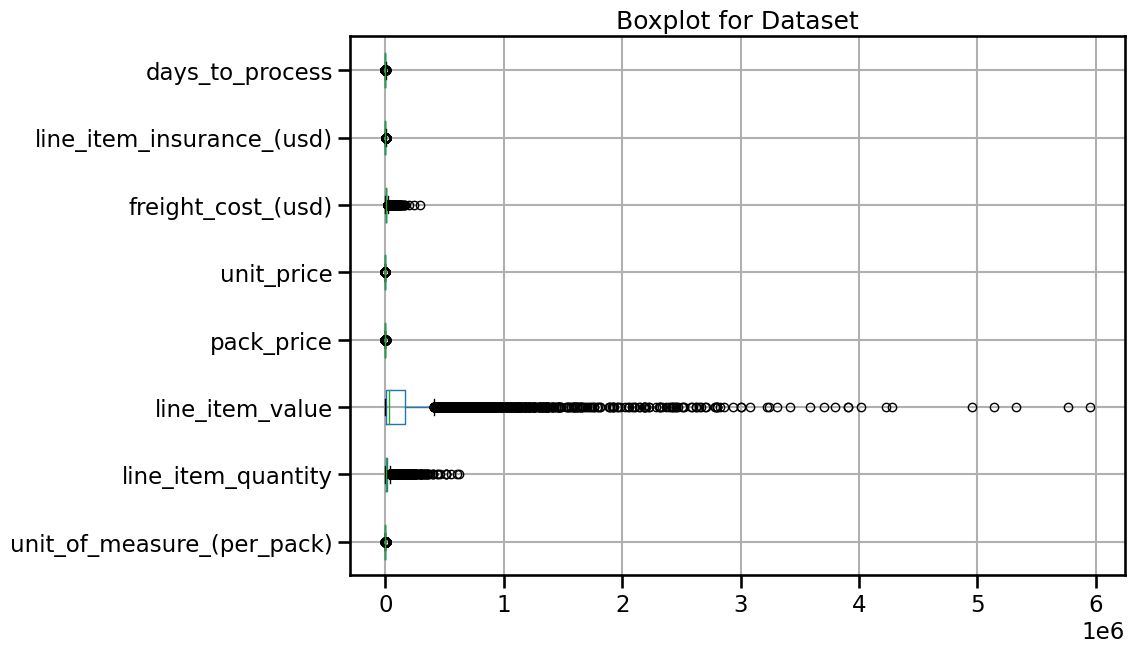

In [ ]:
plt.figure(figsize=(10,7))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [ ]:
num=df.select_dtypes(['int64','float64'])

In [ ]:
num

,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,freight_cost_(usd),line_item_insurance_(usd),days_to_process
0,30,19,551.00,29.00,0.97,780.34,47.04,-1095
1,240,1000,6200.00,6.20,0.03,4521.50,47.04,-930
2,100,500,40000.00,80.00,0.80,1653.78,47.04,-1009
3,60,31920,127360.80,3.99,0.07,16007.06,47.04,-1004
4,60,38000,121600.00,3.20,0.05,45450.08,47.04,-1025
...,...,...,...,...,...,...,...,...
10319,60,166571,599655.60,3.60,0.06,3526.69,705.79,277
10320,60,21072,137389.44,6.52,0.11,3526.69,161.71,287
10321,30,514526,5140114.74,9.99,0.33,0.00,5284.04,269
10322,60,17465,113871.80,6.52,0.11,0.00,134.03,216


In [ ]:
num.columns

Index(['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'days_to_process'],
      dtype='object')

Function for detecting outliers in a dataset.
<br>



*   It does this by calculating the interquartile range (IQR) of the dataset, which is a measure of the dispersion of the data. The IQR is calculated by subtracting the first quartile (Q1) from the third quartile (Q3). The first and third quartiles are the 25th and 75th percentiles of the dataset, respectively.
*   The function then calculates the lower and upper range of the dataset by adding and subtracting 1.5 times the IQR to the first and third quartiles, respectively. Any values that fall outside of this range are considered to be outliers.
* The function returns the lower and upper range, which can be used to identify and filter out outliers from the dataset.

In [ ]:
def detect_outliers(num):
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [ ]:
for i in num:
    lr,ur=detect_outliers(df[i])
    print('\n')
    print(i)
    print('--------------')
    print('Lower Range',lr)
    print('Upper Range',ur)
    print('Proportion of outliers above upper range is',np.round(len(df[df[i]>ur])*100/len(df[i]),decimals=2))
    print('Proportion of outliers below lower range is',np.round(len(df[df[i]<lr])*100/len(df[i]),decimals=2))



unit_of_measure_(per_pack)
--------------
Lower Range -67.5
Upper Range 192.5
Proportion of outliers above upper range is 9.89
Proportion of outliers below lower range is 0.0


line_item_quantity
--------------
Lower Range -24500.0
Upper Range 41900.0
Proportion of outliers above upper range is 13.32
Proportion of outliers below lower range is 0.0


line_item_value
--------------
Lower Range -237467.26749999996
Upper Range 407202.3125
Proportion of outliers above upper range is 10.95
Proportion of outliers below lower range is 0.0


pack_price
--------------
Lower Range -25.625
Upper Range 53.775000000000006
Proportion of outliers above upper range is 11.36
Proportion of outliers below lower range is 0.0


unit_price
--------------
Lower Range -0.5275
Upper Range 1.0924999999999998
Proportion of outliers above upper range is 8.65
Proportion of outliers below lower range is 0.0


freight_cost_(usd)
--------------
Lower Range -8646.375
Upper Range 17641.265
Proportion of outliers above

In [ ]:
num.columns

Index(['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'days_to_process'],
      dtype='object')

In [ ]:
for feature in df[['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'days_to_process']]: 
    lr,ur=detect_outliers(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

[]

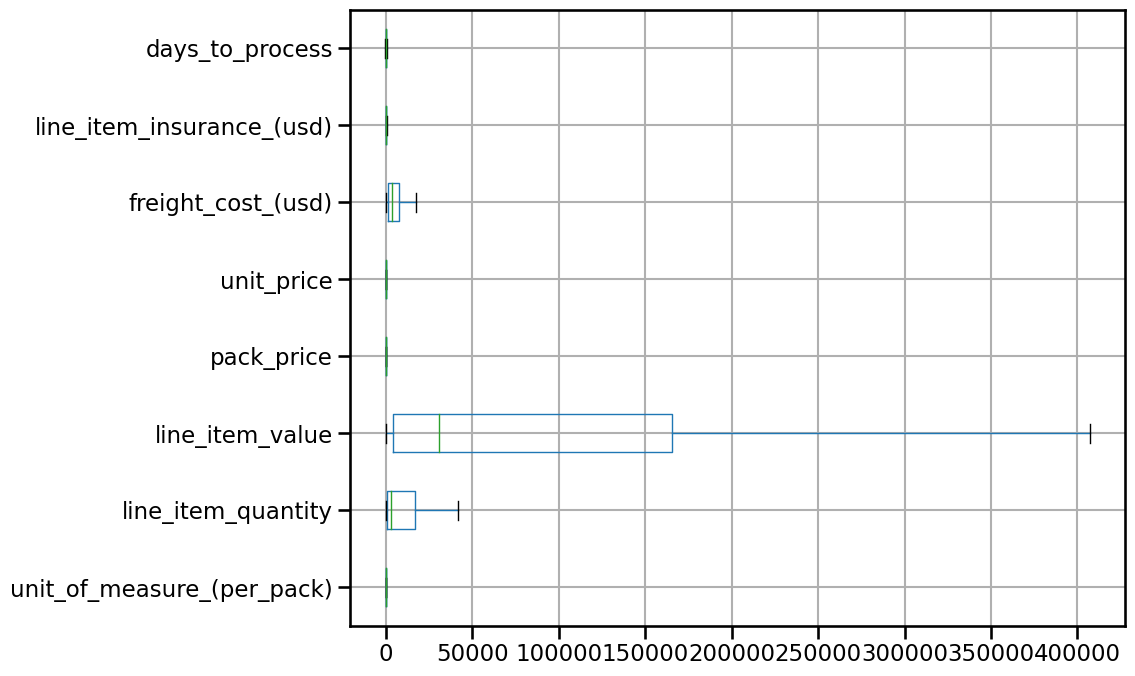

In [ ]:
plt.figure(figsize=(10,8))
df.boxplot(vert=0)
plt.plot()

In [ ]:
df.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,product_group,sub_classification,vendor,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,other,HIV+,other,other,30.0,19.0,551.0,29.000,0.97,other,Yes,780.340,Air,47.04,-385.0
1,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Pediatric,other,Generic,192.5,1000.0,6200.0,6.200,0.03,"Aurobindo Unit III, India",Yes,4521.500,Air,47.04,-385.0
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,others,other,HIV+,other,other,100.0,500.0,40000.0,53.775,0.80,other,Yes,1653.780,Air,47.04,-385.0
3,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Adult,other,Generic,60.0,31920.0,127360.8,3.990,0.07,other,Yes,16007.060,Air,47.04,-385.0
4,SCMS,ASN,Vietnam,Direct Drop,EXW,ARV,Adult,other,Generic,60.0,38000.0,121600.0,3.200,0.05,"Aurobindo Unit III, India",Yes,17641.265,Air,47.04,-385.0


In [ ]:
df['vendor_inco_term'].value_counts()

N/A - From RDC    5199
EXW               2778
DDP               1443
others             699
Name: vendor_inco_term, dtype: int64

#Feature Engineering

In [ ]:
#feature Engineering 

df["po_/_so_#"].value_counts()
df["po_/_so_#"]=pd.get_dummies(df["po_/_so_#"],drop_first=True)

df["asn/dn_#"].value_counts()
df["asn/dn_#"]=pd.get_dummies(df["asn/dn_#"],drop_first=True)

# The map function is used to replace the values in the "country" column with their frequency
df["country"].value_counts()
frequency=df["country"].value_counts().to_dict()
df["country"]=df["country"].map(frequency)

df["fulfill_via"].value_counts()
df["fulfill_via"]=pd.get_dummies(df["fulfill_via"],drop_first=True)

# dummies = pd.get_dummies(df["vendor_inco_term"], drop_first=True)
# df = pd.concat([df, dummies], axis=1)

one_hot = pd.get_dummies(df["vendor_inco_term"])
df = pd.concat([df, one_hot], axis=1)


dummies = pd.get_dummies(df["sub_classification"], drop_first=True)
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df["manufacturing_site"], drop_first=True)
df = pd.concat([df, dummies], axis=1)

df["first_line_designation"].value_counts()
df["first_line_designation"]=pd.get_dummies(df["first_line_designation"],drop_first=True)

dummies = pd.get_dummies(df["shipment_mode"], drop_first=True)
df = pd.concat([df, dummies], axis=1)

df["brand"].value_counts()
df["brand"]=pd.get_dummies(df["brand"],drop_first=True)

df["vendor"].value_counts()
df["vendor"]=pd.get_dummies(df["vendor"],drop_first=True)

df["product_group"].value_counts()
df["product_group"]=pd.get_dummies(df["product_group"],drop_first=True)

#Plotting corelations by heatmap

<Axes: >

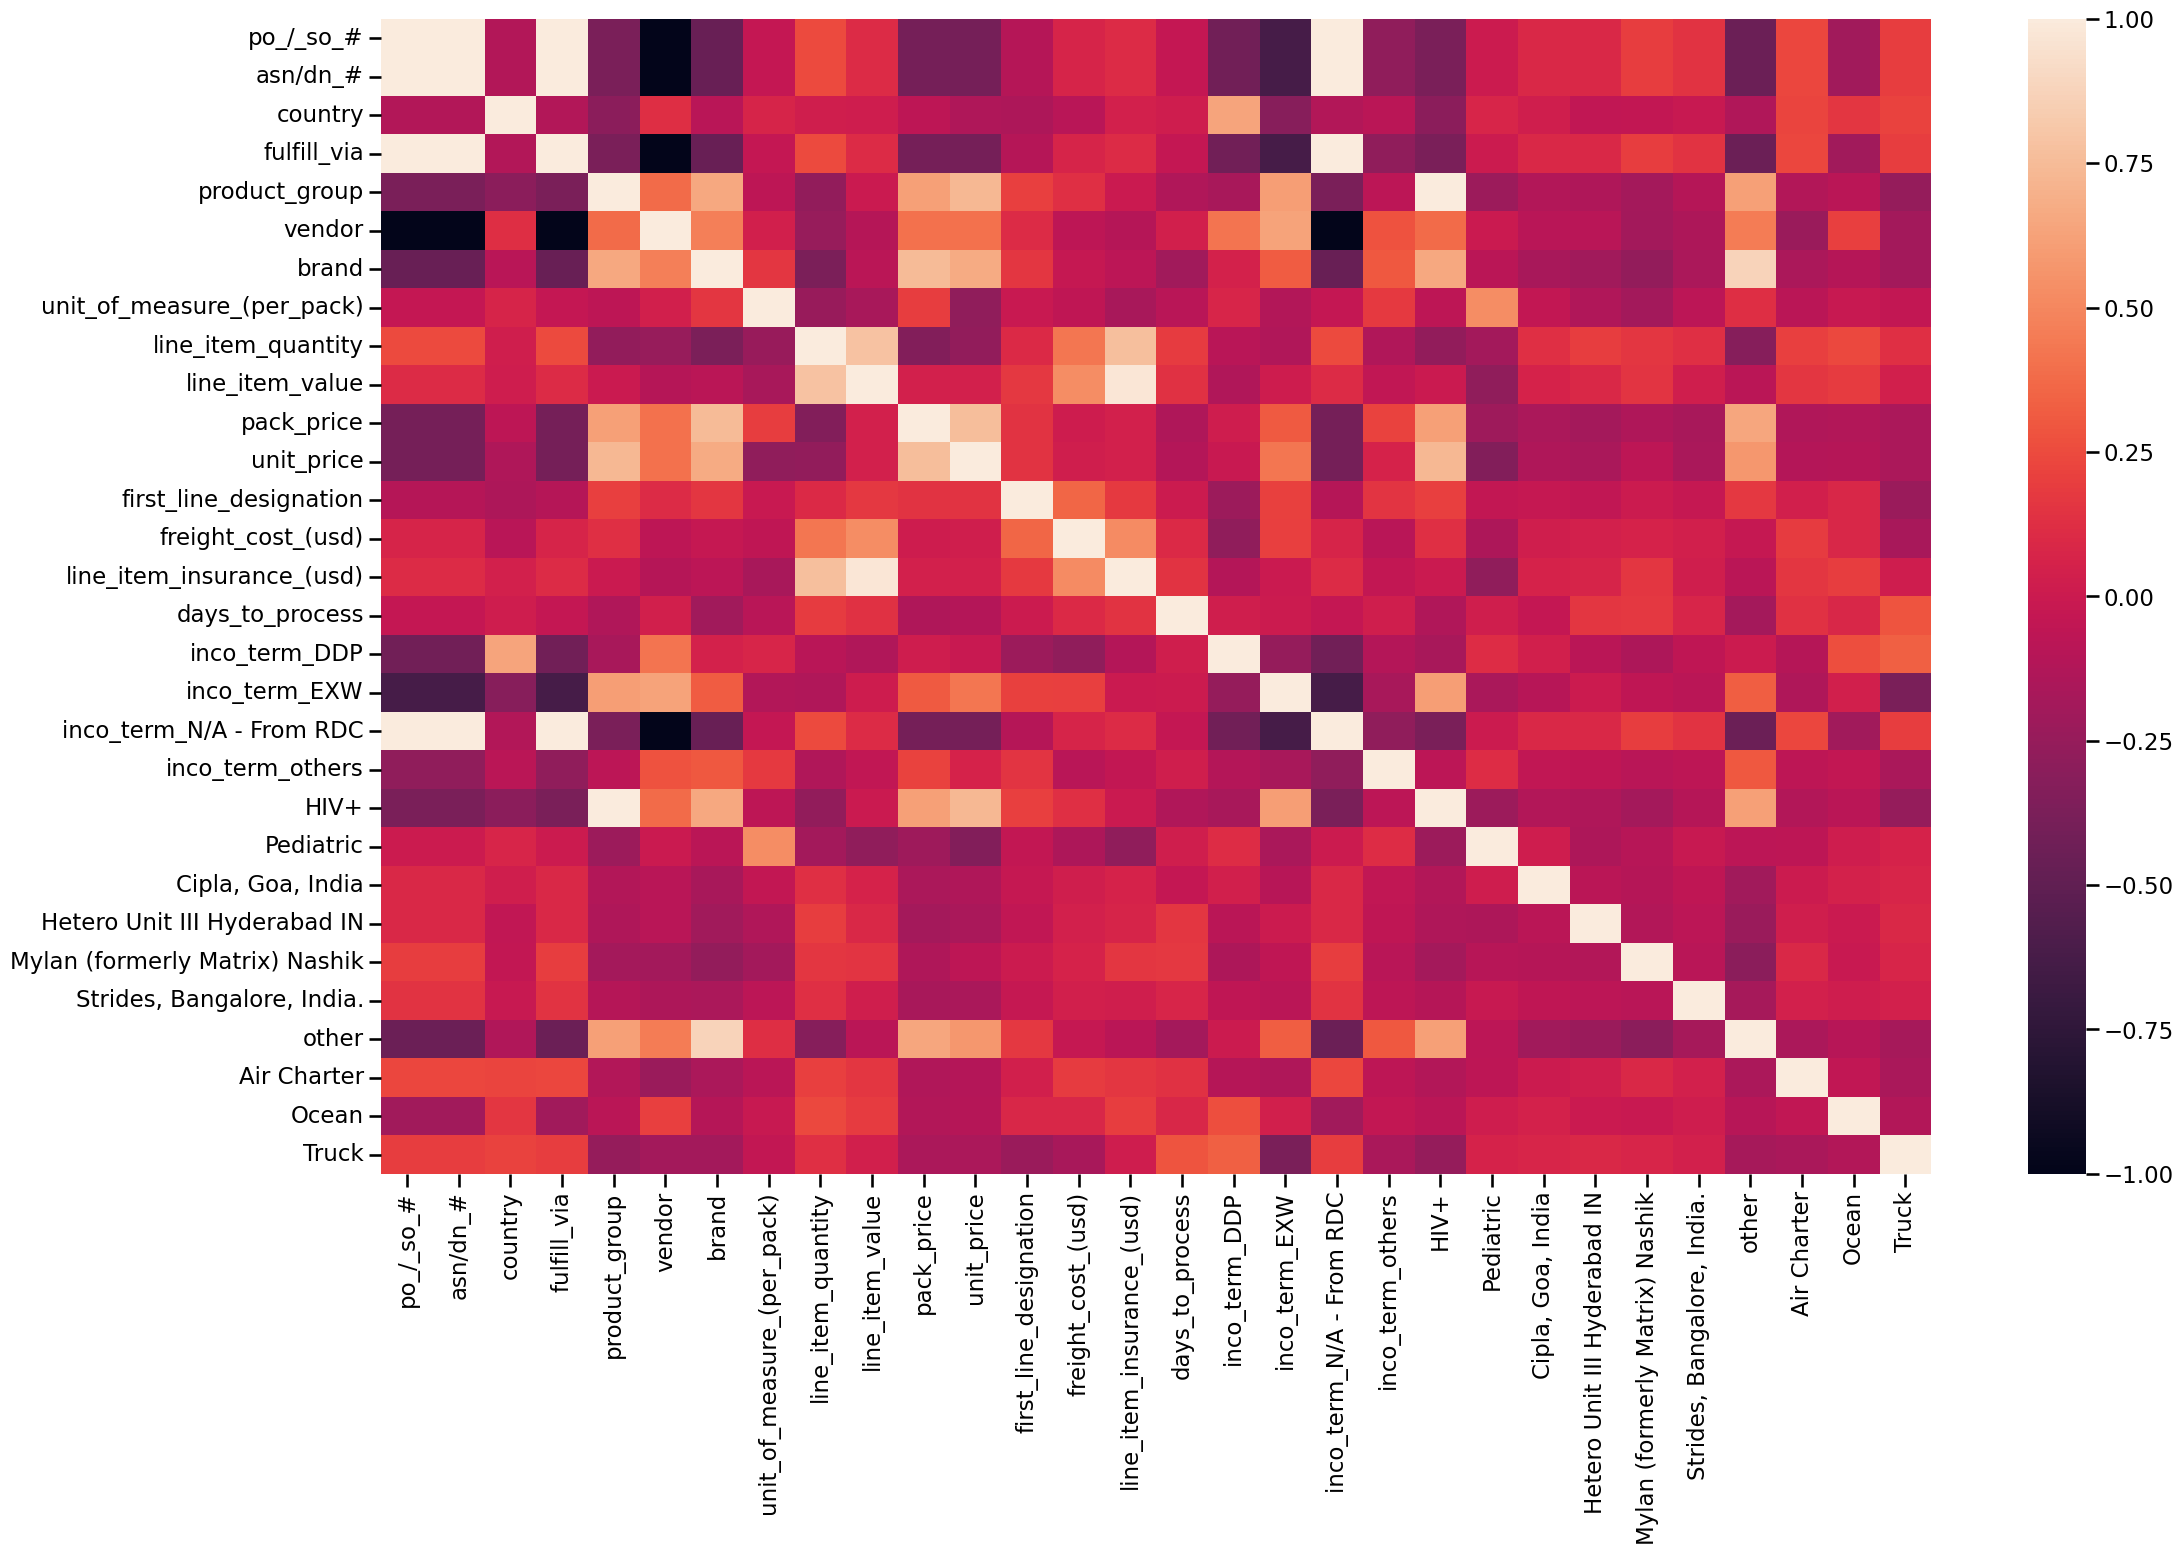

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), annot=False)


#Importing ML Models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.model_selection import train_test_split


In [ ]:
df2=df.copy()
df2.head().T

,0,1,2,3,4
po_/_so_#,0,0,0,0,0
asn/dn_#,0,0,0,0,0
country,1046,688,1046,688,688
fulfill_via,0,0,0,0,0
vendor_inco_term,EXW,EXW,others,EXW,EXW
product_group,1,0,1,0,0
sub_classification,HIV+,Pediatric,HIV+,Adult,Adult
vendor,1,1,1,1,1
brand,1,0,1,0,0
unit_of_measure_(per_pack),30.0,192.5,100.0,60.0,60.0


In [ ]:
df.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term',
       'product_group', 'sub_classification', 'vendor', 'brand',
       'unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'freight_cost_(usd)', 'shipment_mode',
       'line_item_insurance_(usd)', 'days_to_process', 'inco_term_DDP',
       'inco_term_EXW', 'inco_term_N/A - From RDC', 'inco_term_others', 'HIV+',
       'Pediatric', 'Cipla, Goa, India', 'Hetero Unit III Hyderabad IN',
       'Mylan (formerly Matrix) Nashik', 'Strides, Bangalore, India.', 'other',
       'Air Charter', 'Ocean', 'Truck', 'DDP', 'EXW', 'N/A - From RDC',
       'others', 'HIV+', 'Pediatric', 'Cipla, Goa, India',
       'Hetero Unit III Hyderabad IN', 'Mylan (formerly Matrix) Nashik',
       'Strides, Bangalore, India.', 'other', 'Air Charter', 'Ocean', 'Truck'],
      dtype='object')

In [ ]:
len(df.columns)

48

## Linear Regression Using Stats Model

In [ ]:
X=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [ ]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (8095, 47)
Number of rows and columns of the training set for the dependent variable: (8095,)
Number of rows and columns of the test set for the independent variables: (2024, 47)
Number of rows and columns of the test set for the dependent variable: (2024,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

ValueError: ignored

In [ ]:
# One-hot encode "vendor_inco_term" column
df_onehot = pd.get_dummies(df["vendor_inco_term"])

# Concatenate the one-hot encoded columns with the original data
df_encoded = pd.concat([df.drop("vendor_inco_term", axis=1), df_onehot], axis=1)

# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)


ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[['vendor_inco_term']])


In [ ]:
X_train_ohe.toarray()

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
df_encoded = pd.concat([df.drop("vendor_inco_term", axis=1), df_onehot], axis=1)
